In [1]:
import pandas as pd
from scipy import stats as st
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [2]:
visits = pd.read_csv("datasets/visits_log_us.csv")
orders = pd.read_csv("datasets/orders_log_us.csv")
costs = pd.read_csv("datasets/costs_us.csv")

In [3]:
print("Visits: \n")
print(visits.info())

Visits: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
None


In [4]:
visits["Device"].value_counts()

Device
desktop    262567
touch       96833
Name: count, dtype: int64

In [5]:
print("Orders: \n")
print(orders.info())

Orders: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
None


In [6]:
print("Сosts: \n")
print(costs.info())

Сosts: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB
None


1. 2 Procesamiento de Data

In [7]:
print("Duplicates found - ", visits.duplicated().sum(), " records")
visits[:5]

Duplicates found -  0  records


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [8]:
print("Duplicates found - ", orders.duplicated().sum(), " records")
orders[:5]

Duplicates found -  0  records


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [9]:
print("Duplicates found - ", costs.duplicated().sum(), " records")
costs[:5]

Duplicates found -  0  records


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


Conclusion:

In [10]:
visits = visits.rename(
    columns={"End Ts": "End_Ts", "Source Id": "Source_Id", "Start Ts": "Start_Ts"}
)
orders = orders.rename(columns={"Buy Ts": "Buy_Ts"})
visits = visits.rename(str.lower, axis="columns")
orders = orders.rename(str.lower, axis="columns")

In [11]:
# Asegúrate de que la columna 'start_ts' sea de tipo datetime
visits["start_ts"] = pd.to_datetime(visits["start_ts"])

# Extraer el día, la semana, el mes y el año
visits["day"] = visits["start_ts"].dt.day
visits["week"] = visits["start_ts"].dt.isocalendar().week
visits["month"] = visits["start_ts"].dt.month
visits["year"] = visits["start_ts"].dt.year

# Calcular DAU, WAU y MAU
dau = visits.groupby(["day", "month", "year"]).agg({"uid": "nunique"}).mean()
wau = visits.groupby(["week", "year"]).agg({"uid": "nunique"}).mean()
mau = visits.groupby(["month", "year"]).agg({"uid": "nunique"}).mean()

# Mostrar resultados
print("{:} people use the app every day.".format(int(dau)))
print("{:} people use the app every week.".format(int(wau)))
print("{:} people use the app every month.".format(int(mau)))

907 people use the app every day.
5716 people use the app every week.
23228 people use the app every month.


C:\Users\User\AppData\Local\Temp\ipykernel_24340\1431728515.py:16: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print("{:} people use the app every day.".format(int(dau)))
C:\Users\User\AppData\Local\Temp\ipykernel_24340\1431728515.py:17: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print("{:} people use the app every week.".format(int(wau)))
C:\Users\User\AppData\Local\Temp\ipykernel_24340\1431728515.py:18: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print("{:} people use the app every month.".format(int(mau)))


In [12]:
# Let's prepare the data for building the graph "Number of users per day"
# DAU
dau_graph = visits.groupby(["year", "month", "day"]).agg({"uid": "nunique"})
dau_graph = dau_graph.reset_index()

dau_graph["day"] = dau_graph["day"].astype("string")
dau_graph["month"] = dau_graph["month"].astype("string")
dau_graph["year"] = dau_graph["year"].astype("string")

dau_graph["xticks"] = dau_graph["month"] + "." + dau_graph["year"]

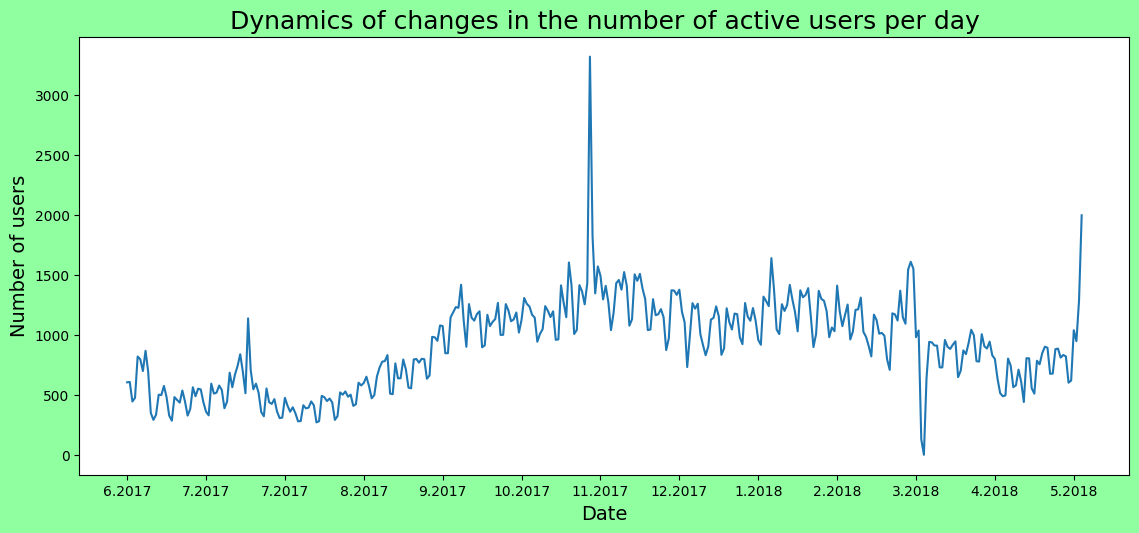

In [13]:
fig, ax = plt.subplots(figsize=(15, 6))
fig.subplots_adjust(bottom=0.15, left=0.2)
ax.plot(dau_graph["uid"])
x_pos = np.arange(len(dau_graph["uid"]))
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Number of users", fontsize=14)
ax.set_title("Dynamics of changes in the number of active users per day", fontsize=18)
fig.patch.set_facecolor("xkcd:mint green")
plt.xticks(x_pos, dau_graph["xticks"])
loc = ticker.MultipleLocator(base=30)
ax.xaxis.set_major_locator(loc)

plt.show()

Conclusion:

In [14]:
# MAU
mau_graph = visits.groupby(["year", "month"]).agg({"uid": "nunique"})
mau_graph = mau_graph.reset_index()

mau_graph["month"] = mau_graph["month"].astype("string")
mau_graph["year"] = mau_graph["year"].astype("string")

mau_graph["xticks"] = mau_graph["month"] + "." + mau_graph["year"]

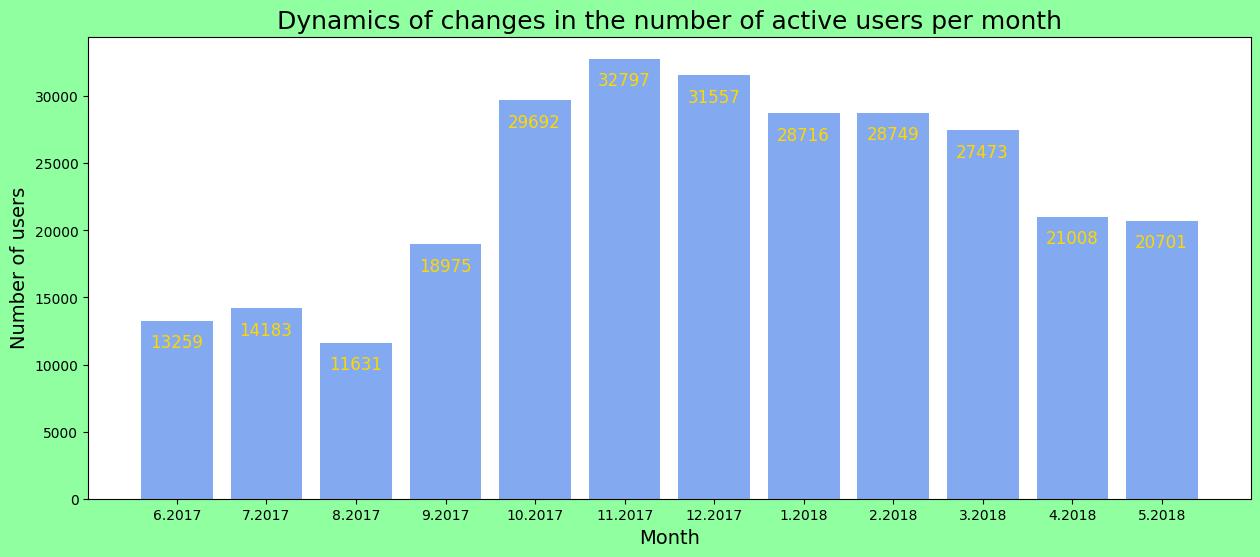

In [15]:
# Let's build a graph:

n = len(mau_graph["xticks"])
ind = np.arange(n)

fig, ax = plt.subplots(figsize=(15, 6))
plt.bar(ind, mau_graph["uid"], align="center", alpha=0.8, color="cornflowerblue")

fig.patch.set_facecolor("xkcd:mint green")
plt.xlabel("Month", fontsize=14)
plt.ylabel("Number of users", fontsize=14)
plt.title("Dynamics of changes in the number of active users per month", fontsize=18)
plt.xticks(ind, mau_graph["xticks"])
for idx, i in enumerate(ax.patches):
    ax.text(
        i.get_x() + 0.1,
        i.get_height() - 2000,
        int(mau_graph["uid"][idx]),
        fontsize=12,
        color="gold",
    )
plt.show()

Conclusion:

In [16]:
sticky_factor_w = dau / wau * 100
sticky_factor_m = dau / mau * 100
print("DAU/WAU is {:.2f}.".format(sticky_factor_w[0]))
print("DAU/MAU is {:.2f}.".format(sticky_factor_m[0]))

DAU/WAU is 15.88.
DAU/MAU is 3.91.


C:\Users\User\AppData\Local\Temp\ipykernel_24340\847748239.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("DAU/WAU is {:.2f}.".format(sticky_factor_w[0]))
C:\Users\User\AppData\Local\Temp\ipykernel_24340\847748239.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("DAU/MAU is {:.2f}.".format(sticky_factor_m[0]))


In [17]:
visits["date"] = visits["start_ts"].dt.floor("1D")
min_date = visits["date"].min()  # date of first visit

dau_all_term = visits.groupby(["date"]).agg({"uid": "nunique"})
dau_all_term = dau_all_term.reset_index()

In [18]:
def fill_sticky_factor(item):
    # skip the first 30 days so that we can calculate the data for the first month
    if int((item - min_date) / np.timedelta64(1, "D")) > 29:
        dau_day_x = dau_all_term[dau_all_term["date"] == item]["uid"].min()
        maintime = item - pd.Timedelta(days=30)
        mau_day_x = visits.query("date <= @item and date > @maintime")["uid"].nunique()
        return dau_day_x / mau_day_x * 100
    else:
        return 0


dau_all_term["sticky_factor"] = dau_all_term["date"].apply(fill_sticky_factor)

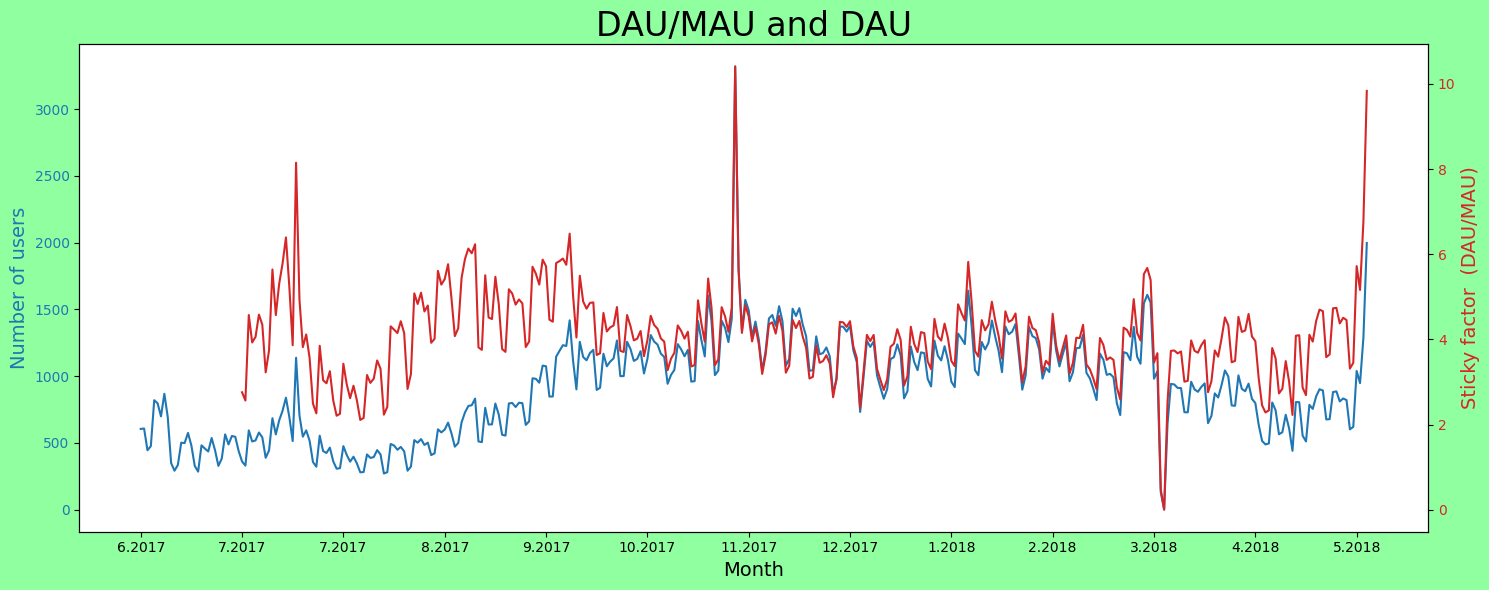

In [19]:
# graph 1. Sticky factor  (DAU/MAU and DAU)
fig, ax1 = plt.subplots(figsize=(15, 6))
color_ax1 = "tab:blue"
plt.plot(dau_graph["uid"], color=color_ax1)

x_pos = np.arange(len(dau_graph["uid"]))
fig.patch.set_facecolor("xkcd:mint green")
plt.xlabel("Month", fontsize=14)
plt.ylabel("Number of users", fontsize=14, color=color_ax1)
plt.tick_params(axis="y", labelcolor=color_ax1)
plt.title("DAU/MAU and DAU", fontsize=24)
plt.xticks(x_pos, dau_graph["xticks"])
loc = ticker.MultipleLocator(base=30)
ax1.xaxis.set_major_locator(loc)

# plot graph 2.  Sticky factor
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color_ax2 = "tab:red"
ax2.set_ylabel(
    "Sticky factor  (DAU/MAU)", color=color_ax2, fontsize=14
)  # we already handled the x-label with ax1
ax2.plot(dau_all_term.query("sticky_factor > 0")["sticky_factor"], color=color_ax2)
ax2.tick_params(axis="y", labelcolor=color_ax2)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

Conclusion:

In [20]:
dau_all_term["month"] = dau_all_term["date"].dt.month
dau_all_term["year"] = dau_all_term["date"].dt.year
dau_all_term["month"] = dau_all_term["month"].astype("string")
dau_all_term["year"] = dau_all_term["year"].astype("string")

dau_all_term["xticks"] = dau_all_term["month"] + "." + dau_all_term["year"]
dau_month = dau_all_term.groupby("xticks").agg({"sticky_factor": "mean"})
dau_month = dau_month.reset_index()
mau_graph = mau_graph.merge(dau_month, on="xticks")
pattern = mau_graph

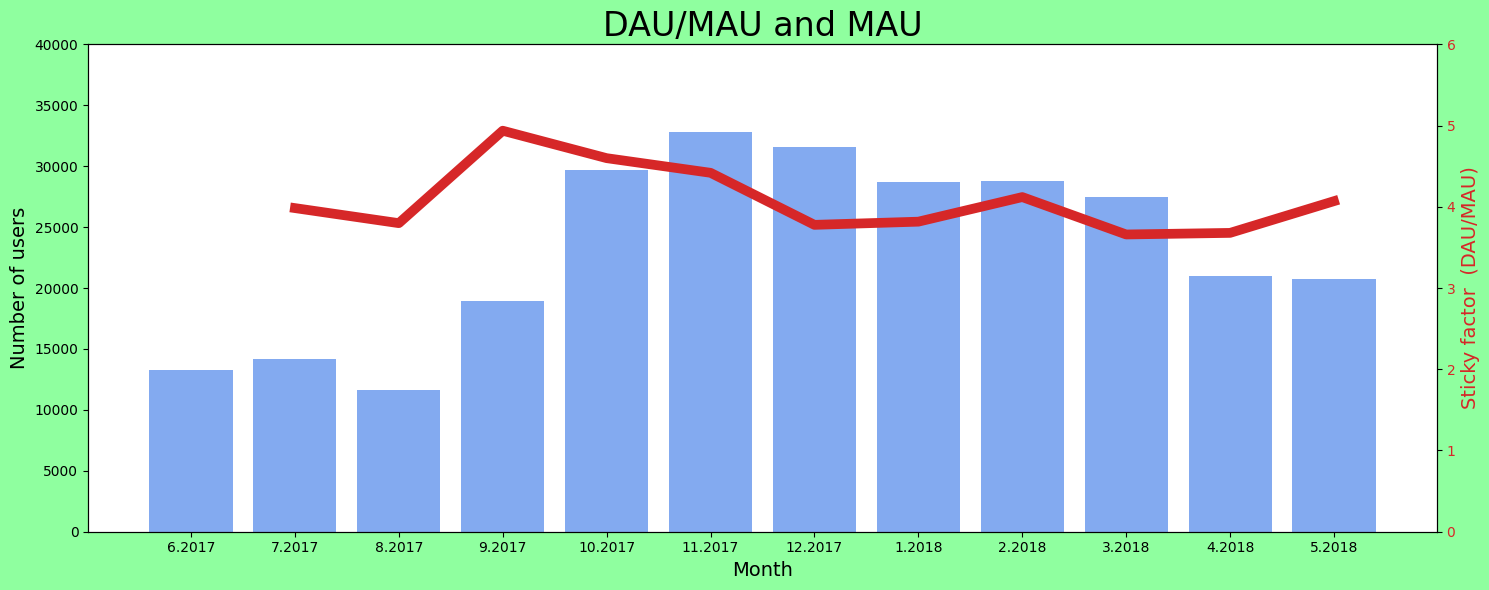

In [21]:
# Let's build a graph:
t = np.arange(0.01, 10.0, 0.01)
data1 = np.exp(t)
data2 = np.sin(2 * np.pi * t)
n = len(mau_graph["xticks"])
ind = np.arange(n)

fig, ax1 = plt.subplots(figsize=(15, 6))
plt.bar(ind, mau_graph["uid"], align="center", alpha=0.8, color="cornflowerblue")

fig.patch.set_facecolor("xkcd:mint green")
plt.xlabel("Month", fontsize=14)
plt.ylabel("Number of users", fontsize=14)
plt.title("DAU/MAU and MAU", fontsize=24)
plt.xticks(ind, mau_graph["xticks"])
ax1.set_ylim([0, 40000])


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = "tab:red"
ax2.set_ylabel(
    "Sticky factor  (DAU/MAU)", color=color, fontsize=14
)  # we already handled the x-label with ax1
ax2.plot(
    mau_graph.query("sticky_factor > 0")["sticky_factor"], color=color, linewidth=7.0
)
ax2.tick_params(axis="y", labelcolor=color)
ax2.set_ylim([0, 6])
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

Conclusion:

In [22]:
sessions_per_day = visits.groupby(["year", "month", "day"]).agg({"uid": "count"})
sessions_per_day = sessions_per_day.rename(columns={"uid": "count_sessions"})
print("Average number of sessions per day - {:}".format(int(sessions_per_day.mean())))

Average number of sessions per day - 987


C:\Users\User\AppData\Local\Temp\ipykernel_24340\2292061166.py:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print("Average number of sessions per day - {:}".format(int(sessions_per_day.mean())))


In [23]:
sessions_per_day = sessions_per_day.reset_index().reset_index()
dau_graph = dau_graph.reset_index()

In [24]:
dau_graph = dau_graph.merge(sessions_per_day, on="index")
dau_graph = dau_graph[["index", "xticks", "uid", "count_sessions"]]

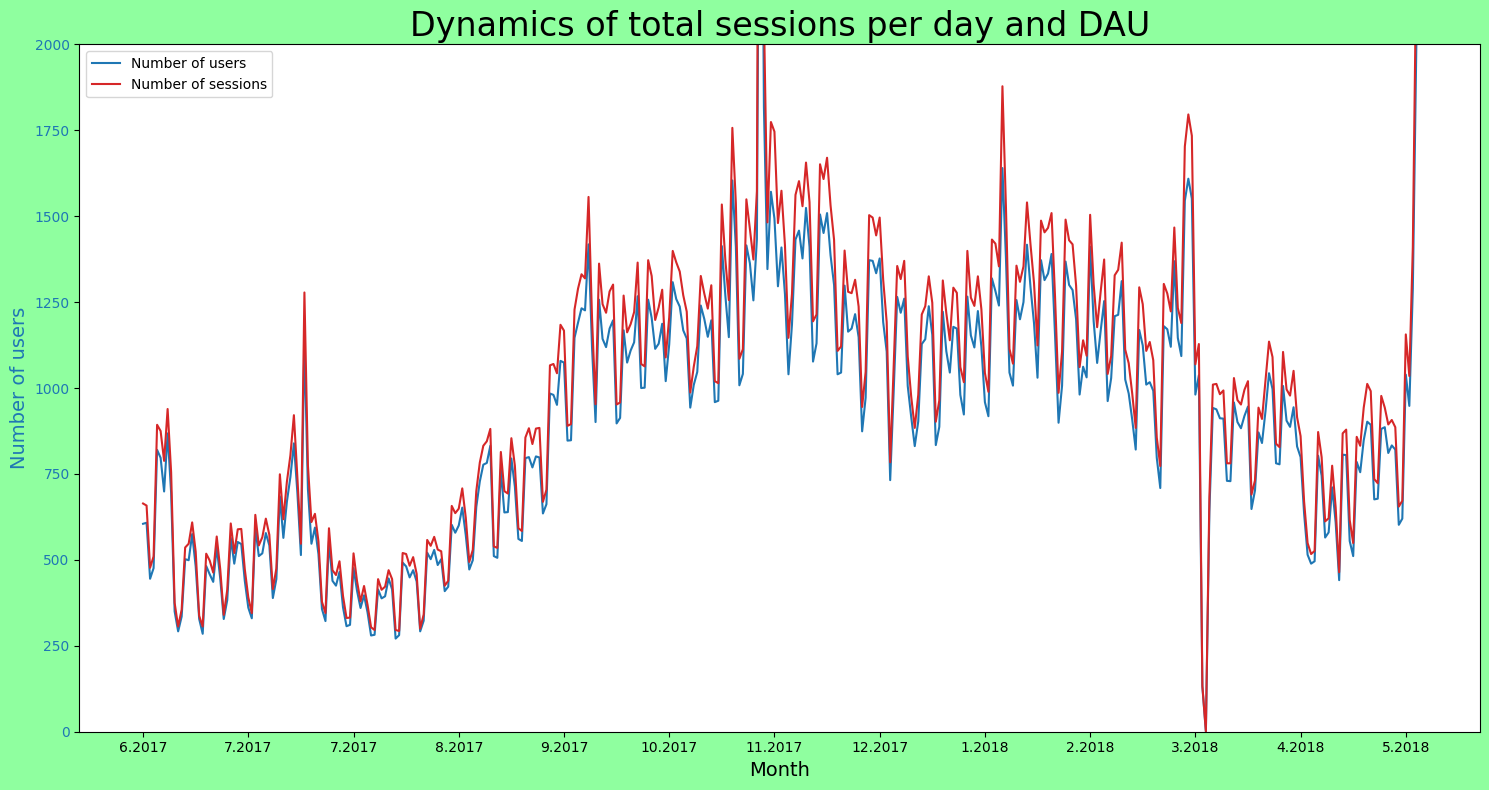

In [25]:
# graph 1. DAU (total sessions and DAU)
fig, ax1 = plt.subplots(figsize=(15, 8))
color_ax1 = "tab:blue"
color_ax2 = "tab:red"
plt.plot(dau_graph["uid"], color=color_ax1)
plt.plot(dau_graph["count_sessions"], color=color_ax2)

x_pos = np.arange(len(dau_graph["uid"]))
fig.patch.set_facecolor("xkcd:mint green")
plt.xlabel("Month", fontsize=14)
plt.ylabel("Number of users", fontsize=14, color=color_ax1)
plt.tick_params(axis="y", labelcolor=color_ax1)
plt.title("Dynamics of total sessions per day and DAU", fontsize=24)
plt.xticks(x_pos, dau_graph["xticks"])
loc = ticker.MultipleLocator(base=30)
ax1.xaxis.set_major_locator(loc)
ax1.set_ylim([0, 2000])
plt.legend(["Number of users", "Number of sessions"])

fig.tight_layout()
plt.show()

Conclusion:

In [26]:
dau_graph["number_sessions_per_user"] = dau_graph["count_sessions"] / dau_graph["uid"]

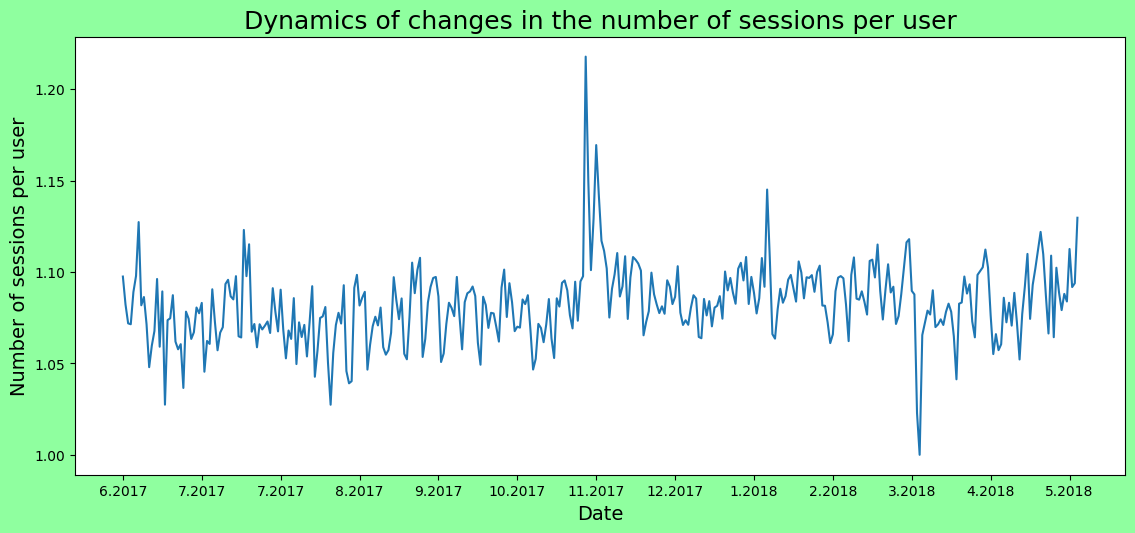

In [27]:
fig, ax = plt.subplots(figsize=(15, 6))
fig.subplots_adjust(bottom=0.15, left=0.2)
ax.plot(dau_graph["number_sessions_per_user"])
x_pos = np.arange(len(dau_graph["number_sessions_per_user"]))
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Number of sessions per user", fontsize=14)
ax.set_title("Dynamics of changes in the number of sessions per user", fontsize=18)
fig.patch.set_facecolor("xkcd:mint green")
plt.xticks(x_pos, dau_graph["xticks"])
loc = ticker.MultipleLocator(base=30)
ax.xaxis.set_major_locator(loc)

plt.show()

Conclusion:

In [28]:
sessions_touch = (
    visits[visits["device"] == "touch"]
    .groupby(["year", "month", "day"])
    .agg({"uid": "count"})
    .reset_index()
)
sessions_touch = sessions_touch.rename(columns={"uid": "count_sessions"})
sessions_desktop = (
    visits[visits["device"] == "desktop"]
    .groupby(["year", "month", "day"])
    .agg({"uid": "count"})
    .reset_index()
)
sessions_desktop = sessions_desktop.rename(columns={"uid": "count_sessions"})

In [29]:
def create_column_date(df):
    df["day"] = df["day"].astype("string")
    df["month"] = df["month"].astype("string")
    df["year"] = df["year"].astype("string")
    df["xticks"] = df["month"] + "." + df["year"]
    df["date"] = df["day"] + "." + df["month"] + "." + df["year"]
    return df


create_column_date(sessions_desktop)
create_column_date(sessions_touch)
sessions_desktop = sessions_desktop.rename(
    columns={"count_sessions": "column_name_desktop"}
)
sessions_touch = sessions_touch.rename(columns={"count_sessions": "column_name_touch"})
sessions_desktop = sessions_desktop.merge(sessions_touch, on="date")
sessions_desktop = sessions_desktop[
    ["column_name_desktop", "column_name_touch", "xticks_x", "date"]
]

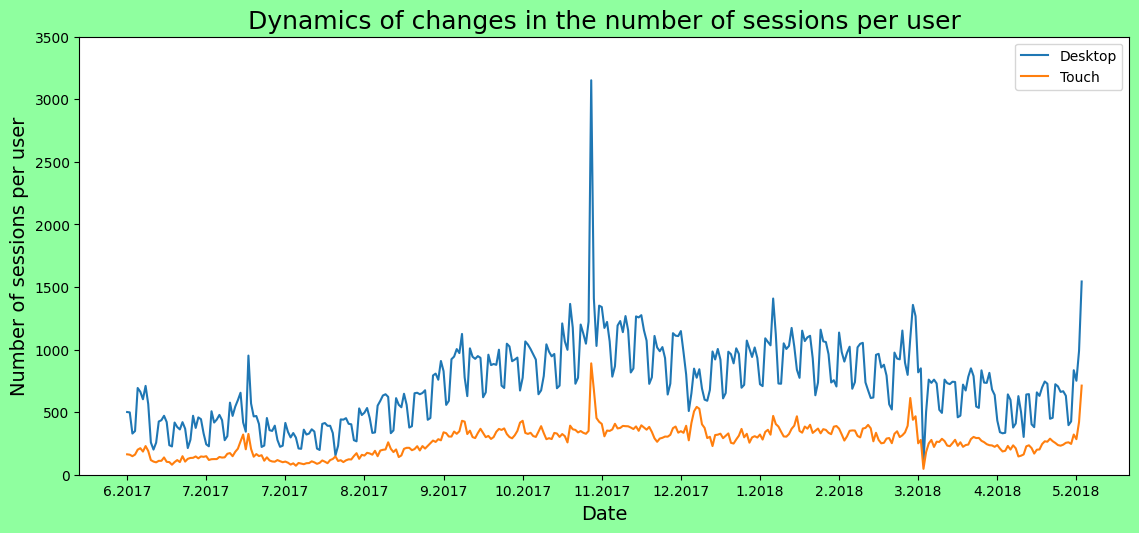

In [30]:
fig, ax = plt.subplots(figsize=(15, 6))
fig.subplots_adjust(bottom=0.15, left=0.2)
ax.plot(sessions_desktop["column_name_desktop"])
ax.plot(sessions_desktop["column_name_touch"])
x_pos = np.arange(len(sessions_desktop["column_name_touch"]))
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Number of sessions per user", fontsize=14)
ax.set_title("Dynamics of changes in the number of sessions per user", fontsize=18)
fig.patch.set_facecolor("xkcd:mint green")
plt.xticks(x_pos, sessions_desktop["xticks_x"])
loc = ticker.MultipleLocator(base=30)
ax.xaxis.set_major_locator(loc)
ax.set_ylim([0, 3500])
plt.legend(["Desktop", "Touch"])
plt.show()

Conclusion:

In [31]:
visits["end_ts"] = pd.to_datetime(visits["end_ts"])
visits["start_ts"] = pd.to_datetime(visits["start_ts"])

visits["session_duration_sec"] = (visits["end_ts"] - visits["start_ts"]).dt.seconds

print(visits[["start_ts", "end_ts", "session_duration_sec"]].head())

             start_ts              end_ts  session_duration_sec
0 2017-12-20 17:20:00 2017-12-20 17:38:00                  1080
1 2018-02-19 16:53:00 2018-02-19 17:21:00                  1680
2 2017-07-01 01:54:00 2017-07-01 01:54:00                     0
3 2018-05-20 10:59:00 2018-05-20 11:23:00                  1440
4 2017-12-27 14:06:00 2017-12-27 14:06:00                     0


count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: session_duration_sec, dtype: float64

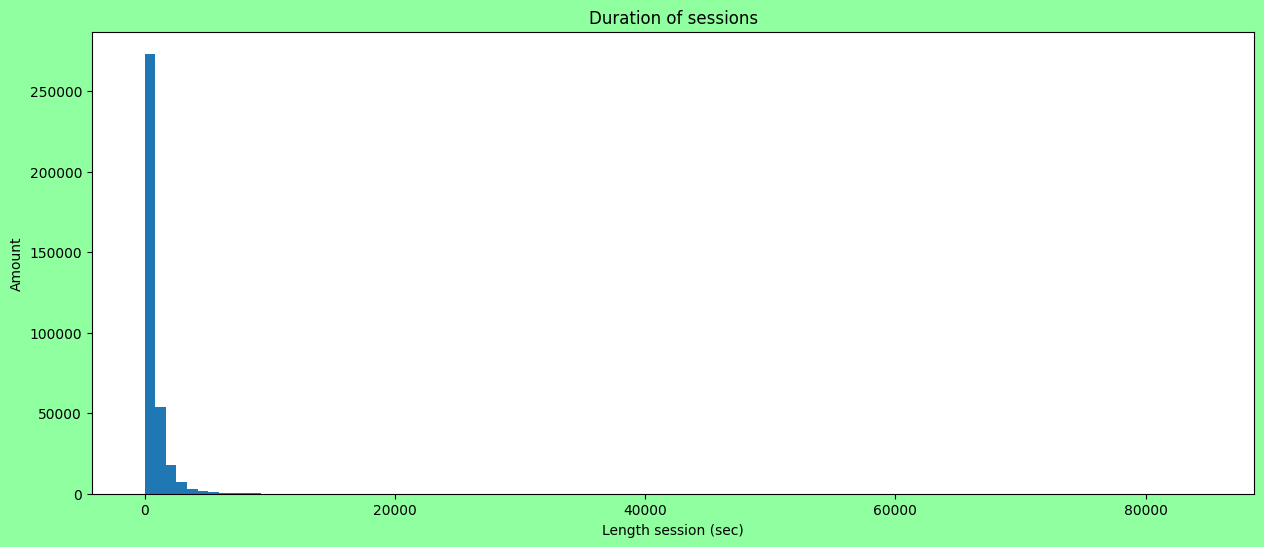

In [32]:
fig, ax = plt.subplots(figsize=(15, 6))
fig.patch.set_facecolor("xkcd:mint green")
plt.hist(visits["session_duration_sec"], density=False, bins=100)
plt.title("Duration of sessions")
plt.ylabel("Amount")
plt.xlabel("Length session (sec)")
# Data structure
visits["session_duration_sec"].describe()

In [33]:
# outlier function
def outliers_lower_upper(name_df, column):
    q1 = name_df[column].quantile(0.25)
    q3 = name_df[column].quantile(0.75)
    iqr = q3 - q1
    if q1 - iqr * 1.5 < 0:
        return (0, q3 + iqr * 1.5)
    else:
        return (q1 - iqr * 1.5, q3 + iqr * 1.5)


outliers_duration_sessions = outliers_lower_upper(visits, "session_duration_sec")
print('Outliers "Duration sessions" is ', outliers_duration_sessions)

Outliers "Duration sessions" is  (0, 1920.0)


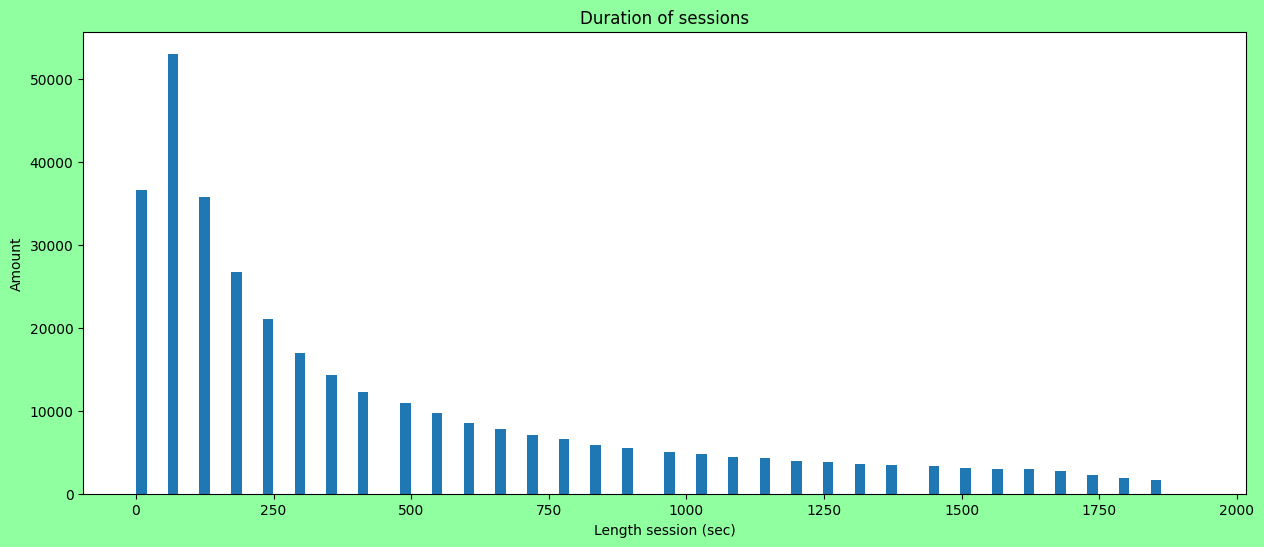

In [34]:
visits_without_outliers = visits[
    visits["session_duration_sec"] < outliers_duration_sessions[1]
]

fig, ax = plt.subplots(figsize=(15, 6))
fig.patch.set_facecolor("xkcd:mint green")
plt.hist(
    visits_without_outliers["session_duration_sec"],
    density=False,
    bins=100,
    range=(0, 1920),
)
plt.title("Duration of sessions")
plt.ylabel("Amount")
plt.xlabel("Length session (sec)")
plt.show()

Conclusion:

In [35]:
visit_avg_lenght = visits_without_outliers["session_duration_sec"].mean()
print("The average session duration is {:.0f} seconds.".format(visit_avg_lenght))
asl = visits["session_duration_sec"].mode()
duration_zerro = len(visits_without_outliers.query("session_duration_sec == 0"))
print("Most often the session lasted ", asl[0], " seconds.")
print(duration_zerro, " sessions of 0 seconds.")

The average session duration is 438 seconds.
Most often the session lasted  60  seconds.
35794  sessions of 0 seconds.


Conclusion:

In [36]:
duration = (
    visits_without_outliers.groupby(["year", "month", "day"])
    .agg({"session_duration_sec": "mean"})
    .reset_index()
)
duration["month"] = duration["month"].astype("string")
duration["year"] = duration["year"].astype("string")
duration["xticks"] = duration["month"] + "." + duration["year"]

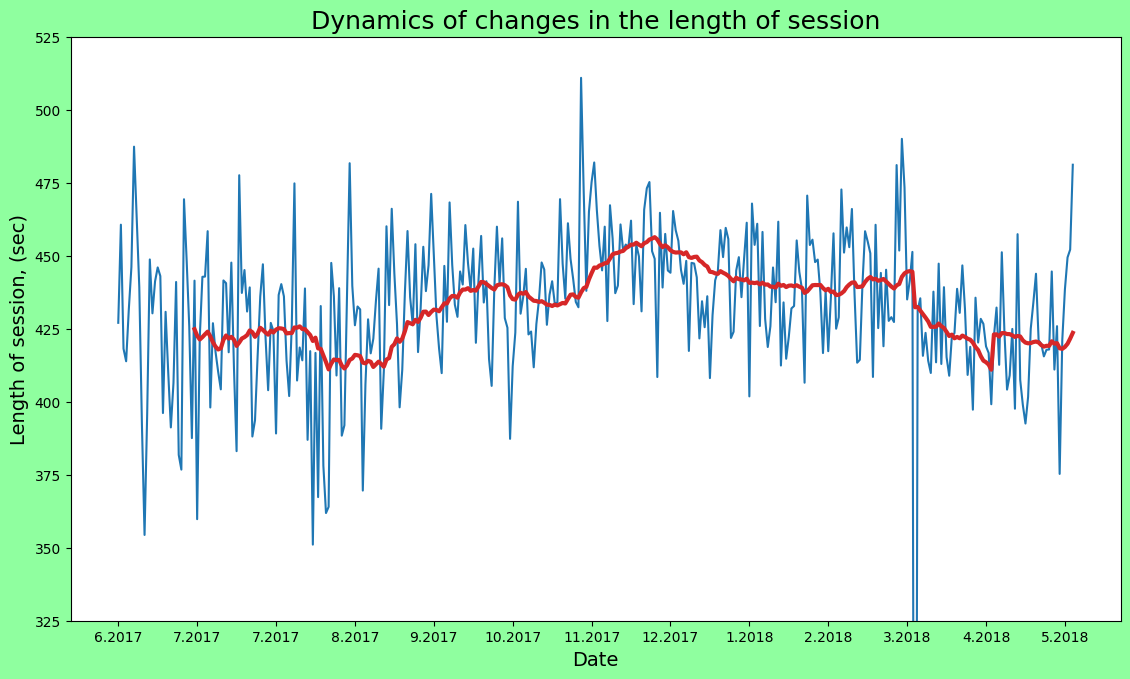

In [37]:
fig, ax = plt.subplots(figsize=(15, 8))
fig.subplots_adjust(bottom=0.15, left=0.2)
ax.plot(duration["session_duration_sec"])
x_pos = np.arange(len(duration["session_duration_sec"]))
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Length of session, (sec)", fontsize=14)
ax.set_title("Dynamics of changes in the length of session", fontsize=18)
fig.patch.set_facecolor("xkcd:mint green")
plt.xticks(x_pos, duration["xticks"])
loc = ticker.MultipleLocator(base=30)
ax.xaxis.set_major_locator(loc)
ax.set_ylim([325, 525])


# plot average line
def moving_average(x, w):
    return np.convolve(x, np.ones(w), "valid") / w


NAvg = 30
XAvg = np.array(x_pos[NAvg - 1 :])
YAvg = moving_average(duration["session_duration_sec"], NAvg)
ax.plot(XAvg, YAvg, color=color, linewidth=3.0)

plt.show()

Conclusion:

Cuándo regresan?

In [41]:
# Copia del DataFrame original para trabajar en la retención de visitas
visits_retention = visits.copy()


def find_first_session(df, name_column, activity_type="first_session"):
    # Encontrar la fecha de la primera visita del usuario
    visits_first = df.groupby(["uid"]).agg({name_column: "min"}).reset_index()
    visits_first = visits_first.rename(columns={name_column: activity_type})
    df = df.merge(visits_first, on="uid", how="left")
    df[activity_type] = df[activity_type].dt.floor("1D")
    return df


def find_beginning_of_month_session(df):
    # Encontrar la fecha de la primera visita del usuario
    df = find_first_session(df, "date")
    # Encontrar el primer día del mes en el que tuvo lugar el primer contacto
    df["first_session"] = pd.to_datetime(df["first_session"]) - pd.to_timedelta(
        df["first_session"].dt.day - 1, unit="d"
    )
    # Encontrar el primer día del mes en el que tuvo lugar el contacto actual
    df["active_session"] = pd.to_datetime(df["date"]) - pd.to_timedelta(
        df["date"].dt.day - 1, unit="d"
    )
    return df


# Asegurarse de que 'date' es del tipo datetime
visits_retention["date"] = pd.to_datetime(visits_retention["start_ts"].dt.floor("1D"))

# Aplicar la función para encontrar el primer día del mes de la sesión
visits_retention = find_beginning_of_month_session(visits_retention)

# Verificar el resultado
print(visits_retention[["uid", "date", "first_session", "active_session"]].head())

                    uid       date first_session active_session
0  16879256277535980062 2017-12-20    2017-12-01     2017-12-01
1    104060357244891740 2018-02-19    2018-02-01     2018-02-01
2   7459035603376831527 2017-07-01    2017-07-01     2017-07-01
3  16174680259334210214 2018-05-20    2018-03-01     2018-05-01
4   9969694820036681168 2017-12-27    2017-12-01     2017-12-01


In [43]:
def calculate_cohort_lifetime(df):
    # Calculamos cuántos meses han pasado entre el contacto actual y el primer contacto
    df["cohort_lifetime"] = round(
        ((df["active_session"] - df["first_session"]) / np.timedelta64(1, "D")) / 30.44
    ).astype(int)

    # Contamos el número de usuarios únicos en cada cohorte cada mes
    cohorts = (
        df.groupby(["first_session", "cohort_lifetime"])
        .agg({"uid": "nunique"})
        .reset_index()
    )
    unique_users_first_month = cohorts[cohorts["cohort_lifetime"] == 0]
    unique_users_first_month = unique_users_first_month.rename(
        columns={"uid": "cohort_0", "cohort_lifetime": "cl2"}
    )
    cohorts = cohorts.merge(unique_users_first_month, on="first_session")

    # Calculamos la tasa de retención
    cohorts["retention"] = cohorts["uid"] / cohorts["cohort_0"]
    cohorts["first_month_str"] = cohorts["first_session"].dt.strftime("%Y.%m")

    # Agrupamos los datos para mostrar en un mapa de calor
    cohorts_pivot_table = cohorts.pivot_table(
        index="first_month_str",
        columns="cohort_lifetime",
        values="retention",
        aggfunc="sum",
    )
    return cohorts_pivot_table


# Aplicar la función para calcular la vida útil de la cohorte
cohorts_pivot_table = calculate_cohort_lifetime(visits_retention)

# Mostrar la tabla pivote de las cohortes
print(cohorts_pivot_table)

cohort_lifetime   0         1         2         3         4         5   \
first_month_str                                                          
2017.06          1.0  0.078664  0.053775  0.061392  0.068557  0.071423   
2017.07          1.0  0.056088  0.051294  0.056164  0.058219  0.048174   
2017.08          1.0  0.076908  0.062862  0.062764  0.050093  0.044004   
2017.09          1.0  0.085489  0.069205  0.050706  0.039392  0.037835   
2017.10          1.0  0.078608  0.052239  0.038958  0.034261  0.032221   
2017.11          1.0  0.078281  0.044113  0.038682  0.033727  0.023415   
2017.12          1.0  0.055802  0.037993  0.031107  0.020263  0.019036   
2018.01          1.0  0.059715  0.039339  0.024973  0.020244       NaN   
2018.02          1.0  0.057080  0.025454  0.020093       NaN       NaN   
2018.03          1.0  0.041818  0.027053       NaN       NaN       NaN   
2018.04          1.0  0.048380       NaN       NaN       NaN       NaN   
2018.05          1.0       NaN       N

Text(0.5, 58.7222222222222, 'Lifetime')

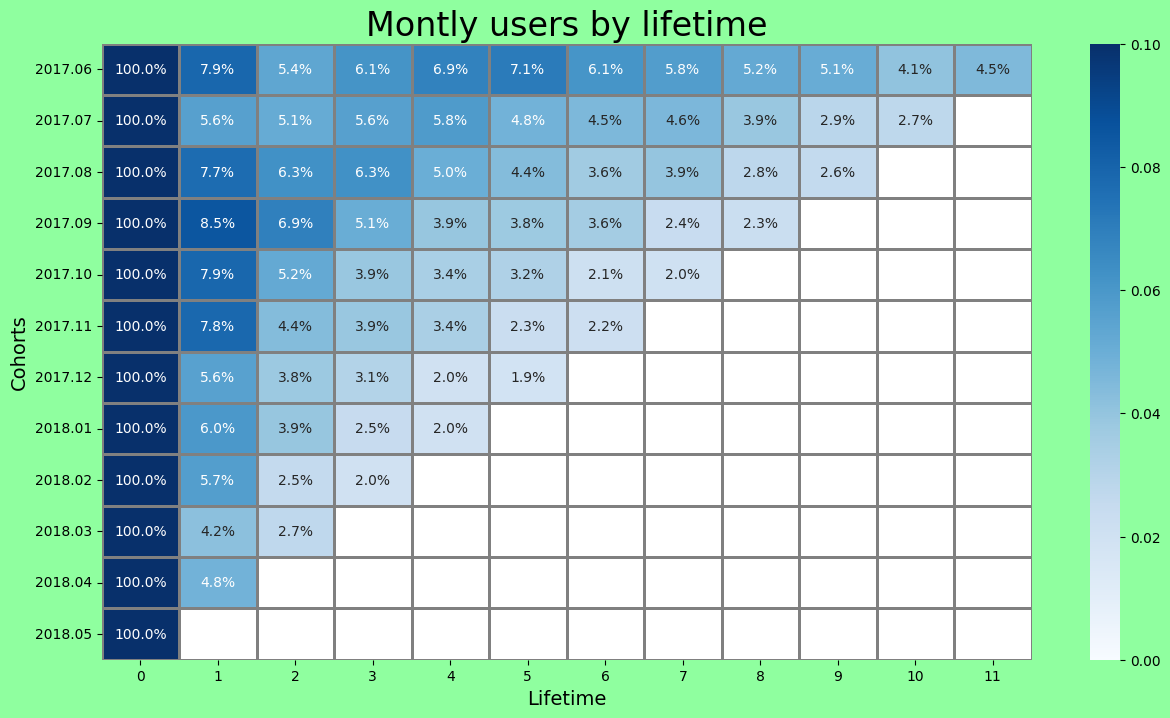

In [44]:
# Let's build a hotmap:
fig, ax = plt.subplots(figsize=(15, 8))
fig.patch.set_facecolor("xkcd:mint green")
plt.title("Montly users by lifetime", fontsize=24)

sns.heatmap(
    cohorts_pivot_table,
    annot=True,
    fmt=".1%",
    linewidths=1,
    linecolor="grey",
    vmin=0,
    vmax=0.1,
    cmap="Blues",
)
ax.set_ylabel("Cohorts", fontsize=14)
ax.set_xlabel("Lifetime", fontsize=14)

Conclusion:
As we can see, no more than 9% of users simultaneously re-access our service from the next months. And every month the number of users decreases. That is, we spend money on attracting clients, but after the first experience of cooperation, most clients do not contact us again. We need to figure out the reasons why users were unhappy and fix them. It is much cheaper to retain a customer than to attract a new one. Next, we will calculate how many users have contacted us for more than 1 time

2. Ventas

- Cuanto tardan en realizar su primera compra


In [51]:
# Asegúrate de que la columna 'buy_ts' sea de tipo datetime
orders["buy_ts"] = pd.to_datetime(orders["buy_ts"])

# Encontrar la fecha del primer pedido en la tabla Orders
orders_first = orders.groupby("uid").agg({"buy_ts": "min"})
orders_first = orders_first.rename(columns={"buy_ts": "first_order"})

# Asegúrate de que la columna 'first_order' sea de tipo datetime
orders_first["first_order"] = orders_first["first_order"].dt.floor("1D")

# Mergear esta información con el DataFrame de visitas para obtener la fecha de registro y la primera compra
visits_orders = visits.merge(orders_first, on="uid", how="left")

# Asegúrate de que la columna 'date' (fecha de la primera visita) sea de tipo datetime
visits_orders["date"] = pd.to_datetime(visits_orders["date"])

# Calcular los días hasta la conversión
visits_orders["conversion_days"] = (
    visits_orders["first_order"] - visits_orders["date"]
).dt.days

# Clasificar las conversiones por días
visits_orders["conversion_category"] = visits_orders["conversion_days"].apply(
    lambda x: f"Conversion {x}d" if not pd.isnull(x) else "No Conversion"
)

# Mostrar los primeros resultados
print(
    visits_orders[
        ["uid", "date", "first_order", "conversion_days", "conversion_category"]
    ].head()
)

                    uid       date first_order  conversion_days  \
0  16879256277535980062 2017-12-20         NaT              NaN   
1    104060357244891740 2018-02-19         NaT              NaN   
2   7459035603376831527 2017-07-01         NaT              NaN   
3  16174680259334210214 2018-05-20  2018-03-09            -72.0   
4   9969694820036681168 2017-12-27         NaT              NaN   

  conversion_category  
0       No Conversion  
1       No Conversion  
2       No Conversion  
3   Conversion -72.0d  
4       No Conversion  


In [52]:
# Let's group the data about the first sessions
visits_conversion = visits[["device", "uid", "date", "source_id"]]
visits_conversion = visits_conversion.sort_values(by="date")

visits_conversion = visits_conversion.groupby("uid").agg(
    {"date": "min", "device": "first", "source_id": "first"}
)
visits_conversion = visits_conversion.rename(columns={"date": "first_session"})

In [53]:
# Let's combine the Orders_First and Visits_First tables
conversion_first = orders_first.merge(visits_conversion, on="uid", how="left")

In [55]:
# Let's calculate the conversion time
conversion_first["term"] = (
    (conversion_first["first_order"] - conversion_first["first_session"])
    / np.timedelta64(1, "D")
).astype("int")

print(conversion_first[[ "first_session", "first_order", "term"]].head())

                 first_session first_order  term
uid                                             
313578113262317     2017-09-18  2018-01-03   107
1575281904278712    2017-06-03  2017-06-03     0
2429014661409475    2017-10-11  2017-10-11     0
2464366381792757    2018-01-27  2018-01-28     1
2551852515556206    2017-11-24  2017-11-24     0


Conclusiones :

Conversiones inmediatas:

Muchos usuarios (e.g., uid 1575281904278712, uid 2429014661409475, uid 2551852515556206) compran el mismo día de su primera visita, lo que indica que algo en su primera experiencia fue lo suficientemente convincente.

Conversiones tardías:

Usuarios como uid 313578113262317 que tardan más de 100 días en convertir podrían necesitar más seguimiento y estrategias de engagement a largo plazo para mantener su interés hasta que se sientan listos para comprar.

Acciones de Marketing:

Comparar estos datos con campañas de marketing específicas puede revelar qué campañas son más efectivas para la conversión inmediata y cuáles necesitan ajustes para mejorar su efectividad.

In [56]:
# 1
avg_conversion = conversion_first["term"].mean()
print("Average conversion is {:.1f} days.".format(avg_conversion))

Average conversion is 16.9 days.


- Conversiones por fuente de origen

In [57]:
conversion_by_source = (
    conversion_first.groupby("source_id").agg({"term": ["mean", "count"]}).reset_index()
)
conversion_by_source.columns = ["source_id", "mean", "count"]
conversion_by_source["ratio_count"] = (
    conversion_by_source["count"] / conversion_by_source["count"].sum() * 100
)


def create_label(item):
    text = "Source " + str(int(item["source_id"]))
    return text


conversion_by_source["label"] = conversion_by_source.apply(create_label, axis=1)

In [58]:
conversion_by_source = conversion_by_source[
    conversion_by_source["mean"] != 0
].reset_index()

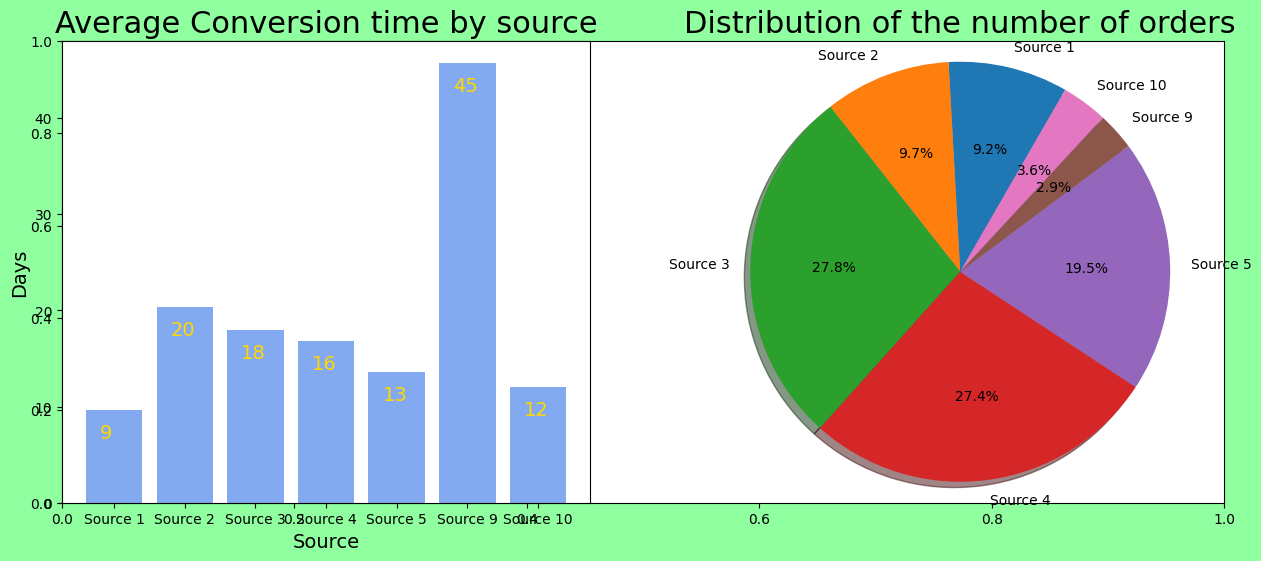

In [59]:
fig, ax1 = plt.subplots(figsize=(15, 6))
fig.patch.set_facecolor("xkcd:mint green")
ax1 = plt.subplot(121)

n = len(conversion_by_source["label"])
ind = np.arange(n)

res = plt.bar(
    ind, conversion_by_source["mean"], align="center", alpha=0.8, color="cornflowerblue"
)

plt.xlabel("Source", fontsize=14)
plt.ylabel("Days", fontsize=14)
plt.title("Average Conversion time by source", fontsize=22)
plt.xticks(ind, conversion_by_source["label"])
for idx, i in enumerate(ax1.patches):
    ax1.text(
        i.get_x() + 0.2,
        i.get_height() - 3,
        int(conversion_by_source["mean"][idx]),
        fontsize=14,
        color="gold",
    )

ax2 = plt.subplot(122)
res = ax2.pie(
    conversion_by_source["ratio_count"],
    #         explode = explode ,
    labels=conversion_by_source["label"],
    autopct="%1.1f%%",
    shadow=True,
    startangle=60,
)
ax2.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2.set_title("Distribution of the number of orders", fontsize=22)

plt.show()

Conclusion:
As we can see, there are no orders from sources 6,7,8. A very long conversion period at source 9. Perhaps because of such a long period, only 2.9% of orders come from source 9. The most popular sources are 3 and 4, and their conversion time is 18 and 16 days, respectively. Best conversion time from 1 source.

- conversiones por plazos de tiempo

In [60]:
# determining the type of conversion
def type_conversion(term):
    if term == 0:
        return "Conversion 0d"
    if term <= 7:
        return "Conversion 7d"
    if term <= 14:
        return "Conversion 14d"
    if term <= 30:
        return "Conversion 30d"
    else:
        return "Conversion >30d"

In [61]:
# Let's calculate the shares of each type of conversion
conversion_first["type_conversion"] = conversion_first["term"].apply(type_conversion)
conversion_shares = conversion_first.groupby("type_conversion").agg(
    {"type_conversion": "count"}
)
conversion_shares = conversion_shares.rename(columns={"type_conversion": "count"})
conversion_shares = conversion_shares.reset_index()
conversion_shares["ratio"] = (
    conversion_shares["count"] / conversion_shares["count"].sum() * 100
)

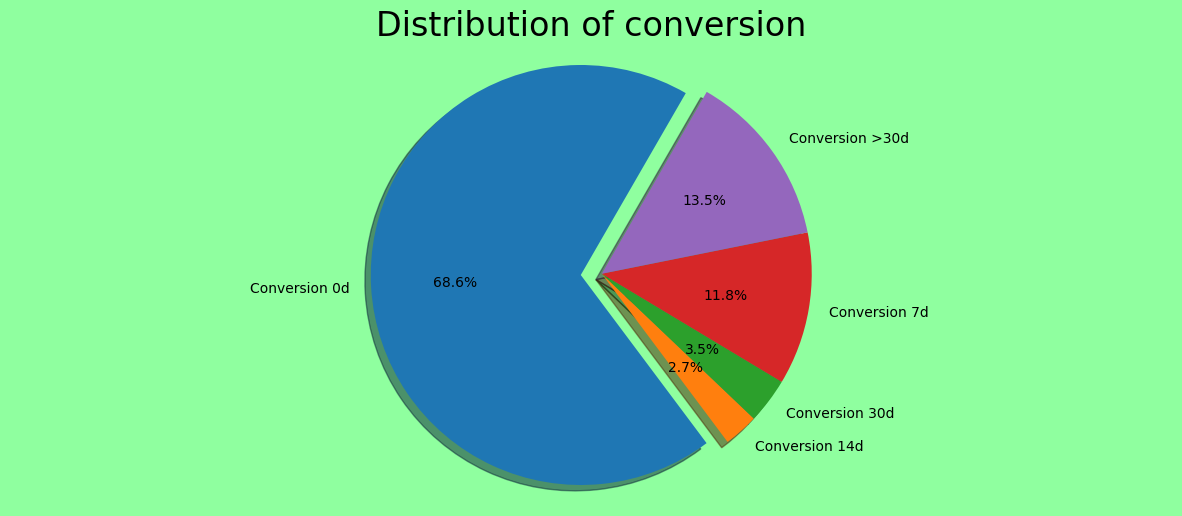

In [62]:
fig, ax1 = plt.subplots(figsize=(15, 6))
fig.patch.set_facecolor("xkcd:mint green")
explode = (0.1, 0, 0, 0, 0)
ax1.pie(
    conversion_shares["ratio"],
    explode=explode,
    labels=conversion_shares["type_conversion"],
    autopct="%1.1f%%",
    shadow=True,
    startangle=60,
)
ax1.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Distribution of conversion", fontsize=24)
plt.show()

Conclusion:
As we can see from the pie chart, 68% of orders are made on the day of the first visit to the site. 11.8% of users make the order within a week after the first visit. More than 13% make their first order no earlier than a month after the first visit.

**- ¿Cuántos pedidos hacen durante un período de tiempo dado?**

In [63]:
orders_all = orders.merge(visits_conversion, on="uid", how="left")
orders_all["actual_date"] = orders_all["buy_ts"].dt.floor("1D")
# Counting the number of orders every day for each source
orders_per_day = orders_all.groupby(["actual_date", "source_id"], as_index=False).agg(
    {"device": "count"}
)
orders_per_day = orders_per_day.rename(columns={"device": "count_orders"})
orders_per_day["label"] = orders_per_day.apply(create_label, axis=1)
source_dict = orders_per_day.sort_values(by="source_id")["label"].unique().tolist()

In [64]:
# function to create a table
def create_df_for_plot(type_source):
    df_source = orders_per_day.query("label == @type_source").pivot_table(
        index="actual_date", values="count_orders", aggfunc="sum"
    )
    return df_source

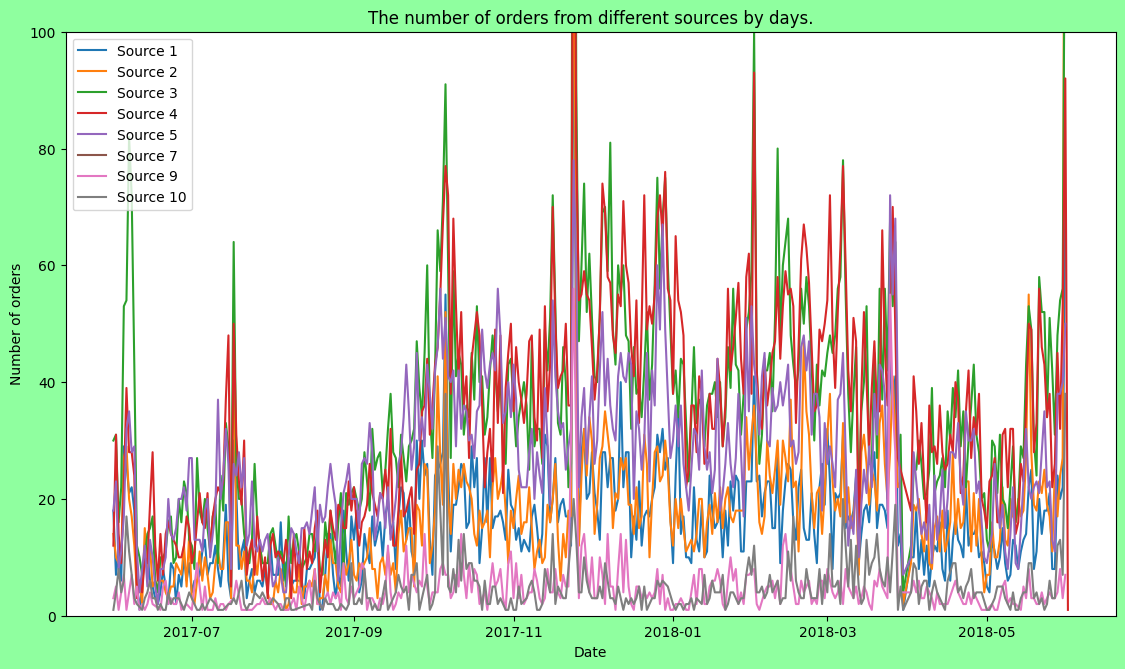

In [65]:
# Let's build graphs
fig, ax = plt.subplots(figsize=(15, 8))
fig.subplots_adjust(bottom=0.15, left=0.2)
for item in source_dict:
    ax.plot(create_df_for_plot(item))

ax.set_xlabel("Date")
ax.set_ylabel("Number of orders")
plt.legend(source_dict)
ax.set_title("The number of orders from different sources by days.")
ax.set_ylim([0, 100])
fig.patch.set_facecolor("xkcd:mint green")

plt.show()

Conclusion:
As we can see, the graph is very detailed and not informative. It is very difficult to perceive information from it. Let's build a schedule based on the number of orders per week.

- Distribución semanal de ordenes por fuente

In [66]:
# Finding the first day of the week
orders_all["first_day_of_week"] = pd.to_datetime(
    orders_all["actual_date"], unit="d"
) - pd.to_timedelta(orders_all["actual_date"].dt.dayofweek, unit="d")
# Calculating the number of orders for this week
orders_per_week = orders_all.groupby(
    ["first_day_of_week", "source_id"], as_index=False
).agg({"device": "count"})
orders_per_week["label"] = orders_per_week.apply(create_label, axis=1)
orders_per_week = orders_per_week.rename(columns={"device": "count_orders"})

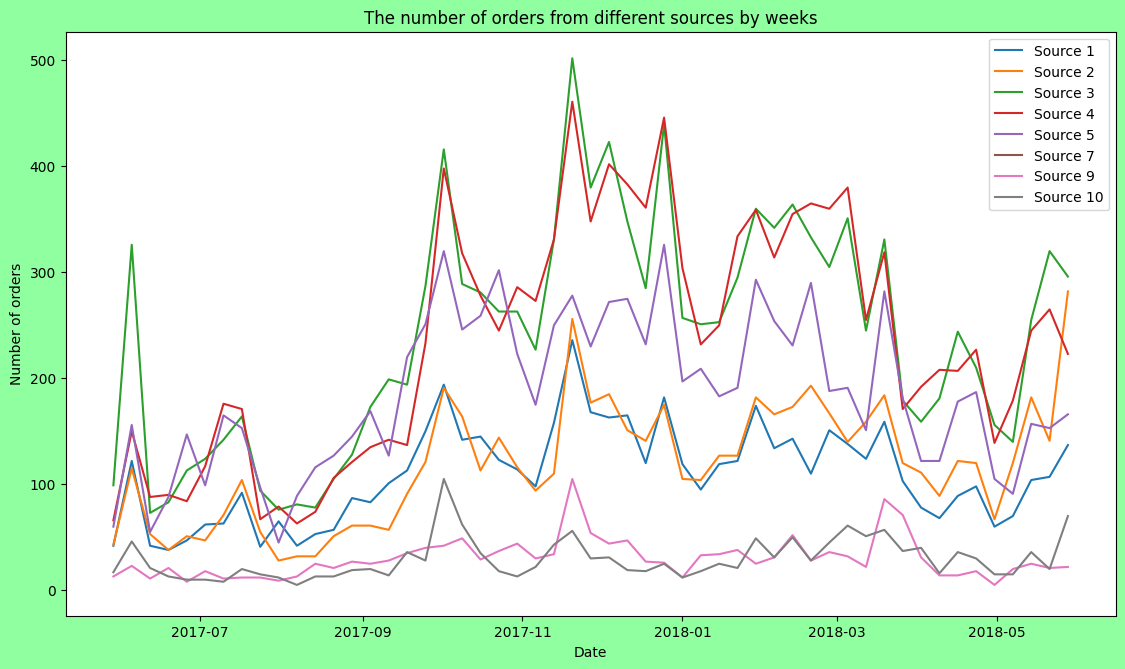

In [67]:
# Let's build graphs
fig, ax = plt.subplots(figsize=(15, 8))
fig.subplots_adjust(bottom=0.15, left=0.2)
for type_source in source_dict:
    ax.plot(
        orders_per_week.query("label == @type_source").pivot_table(
            index="first_day_of_week", values="count_orders", aggfunc="sum"
        )
    )
ax.set_xlabel("Date")
ax.set_ylabel("Number of orders")
plt.legend(source_dict)
ax.set_title("The number of orders from different sources by weeks")
fig.patch.set_facecolor("xkcd:mint green")

plt.show()

Conclusion:
As we can see, in August 2017, orders from all sources were approximately at the same level, but then the number of orders from sources 3,4,5,2, and 1 began to grow. Orders from sources 3 and 4 have grown most of all. And from sources 9 and 10, a consistently low number of orders.

- ahora veamos distribución por cohortes

In [68]:
# Finding the first day of the month
orders_all["first_day_of_month_first_session"] = pd.to_datetime(
    orders_all["first_session"], unit="d"
) - pd.to_timedelta(orders_all["first_session"].dt.day - 1, unit="d")
# Calculating the number of orders for this month
orders_per_cohort = orders_all.groupby(
    ["first_day_of_month_first_session", "source_id"], as_index=False
).agg({"device": "count"})
orders_per_cohort["label"] = orders_per_cohort.apply(create_label, axis=1)
orders_per_cohort = orders_per_cohort.rename(columns={"device": "count_orders"})

In [69]:
# We will find the share of orders from each source in each cohort.
orders_cohort_all = orders_per_cohort.groupby("first_day_of_month_first_session").agg(
    {"count_orders": "sum"}
)
orders_cohort_all = orders_cohort_all.rename(
    columns={"count_orders": "count_orders_all"}
)
orders_per_cohort = orders_per_cohort.merge(
    orders_cohort_all, on="first_day_of_month_first_session"
)
orders_per_cohort["ratio"] = (
    orders_per_cohort["count_orders"] / orders_per_cohort["count_orders_all"]
)

In [70]:
# removing anomalies
orders_per_cohort = orders_per_cohort[
    (orders_per_cohort["label"] != "Source 7")
    & (orders_per_cohort["first_day_of_month_first_session"] != "2018-06-01")
]

orders_per_cohort["first_day_of_month_first_session"] = orders_per_cohort[
    "first_day_of_month_first_session"
].dt.strftime("%Y.%m")

orders_per_cohort_pivot_table = orders_per_cohort.pivot_table(
    index="first_day_of_month_first_session",
    columns="label",
    values="ratio",
    aggfunc="max",
)

Text(0.5, 58.7222222222222, 'Source')

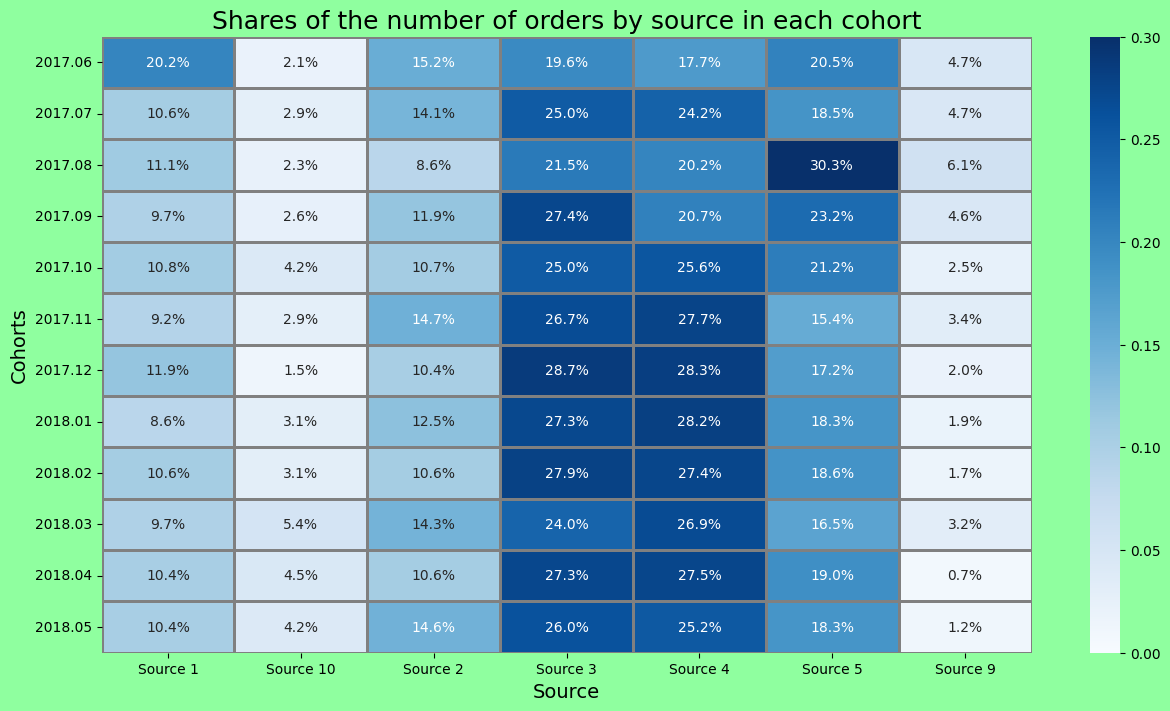

In [71]:
fig, ax = plt.subplots(figsize=(15, 8))
fig.patch.set_facecolor("xkcd:mint green")
plt.title("Shares of the number of orders by source in each cohort", fontsize=18)

sns.heatmap(
    orders_per_cohort_pivot_table,
    annot=True,
    fmt=".1%",
    linewidths=1,
    linecolor="grey",
    vmin=0,
    vmax=0.3,
    cmap="Blues",
    yticklabels=True,
)
ax.set_ylabel("Cohorts", fontsize=14)
ax.set_xlabel("Source", fontsize=14)

Conclusion:
We see that the shares of Sources in different cohorts are approximately the same. However, there are exceptions. The share of source No. 1 in the first cohort is 2 times higher than in other cohorts, and the share of source No. 5 in the third cohort is noticeably higher than in others. It can be concluded that the shares change, but not much.

**- ¿Cuál es el tamaño promedio de compra?**

In [72]:
revenue_per_day = orders_all.groupby(["actual_date"]).agg({"revenue": "mean"})

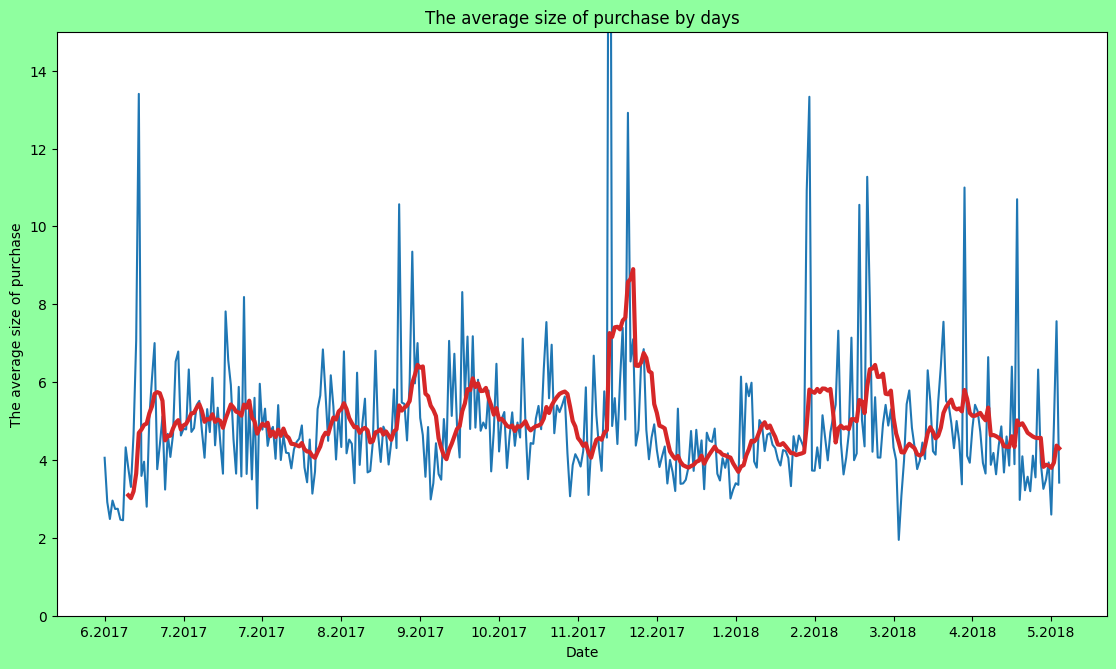

In [73]:
# Let's build graphs
fig, ax = plt.subplots(figsize=(15, 8))
fig.subplots_adjust(bottom=0.15, left=0.2)
x_pos = np.arange(len(revenue_per_day))
XAvg = np.array(x_pos)
ax.plot(XAvg, revenue_per_day["revenue"])
ax.set_xlabel("Date")
ax.set_ylabel("The average size of purchase")
ax.set_title("The average size of purchase by days")
ax.set_ylim([0, 15])
fig.patch.set_facecolor("xkcd:mint green")

plt.xticks(x_pos, duration["xticks"])
loc = ticker.MultipleLocator(base=30)
ax.xaxis.set_major_locator(loc)
# plot average line
NAvg = 10
XAvg = np.array(x_pos[NAvg - 1 :])
YAvg = moving_average(revenue_per_day["revenue"], NAvg)
ax.plot(XAvg, YAvg, color=color, linewidth=3.0)

plt.show()

Conclusions:
The average purchase price ranges from 4-6, with a sharp rise in December 2017 to 9.

- el tamaño promedio de las compras por fuente

In [74]:
revenue_source = orders_all.groupby(["source_id"], as_index=False).agg(
    {"revenue": "mean"}
)
revenue_source["label"] = revenue_source.apply(create_label, axis=1)

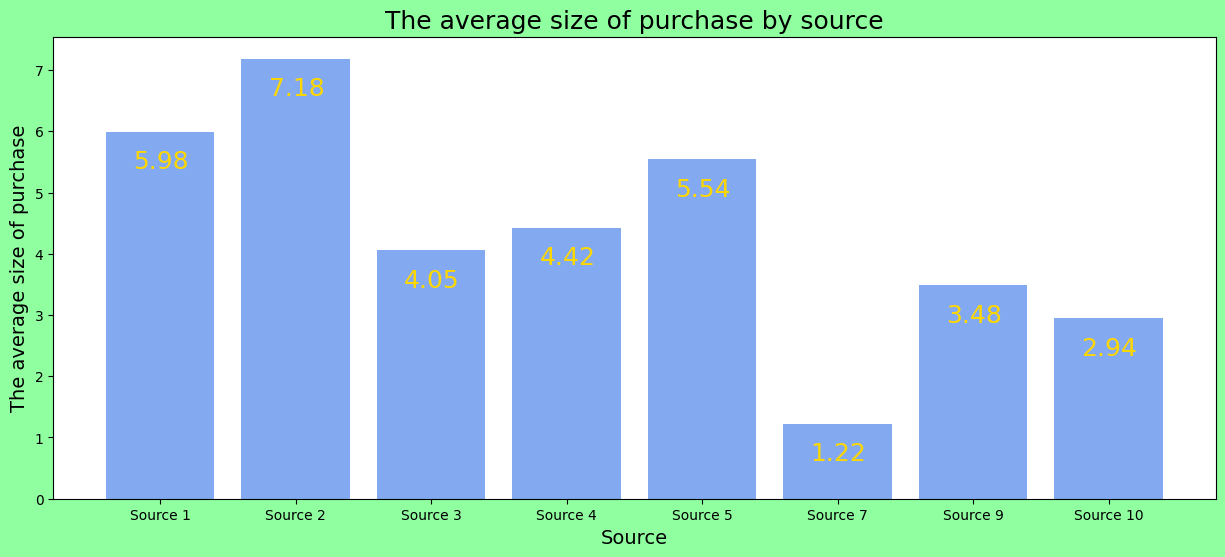

In [75]:
# create a plot

n = len(revenue_source["label"])
ind = np.arange(n)

fig, ax = plt.subplots(figsize=(15, 6))
plt.bar(
    ind, revenue_source["revenue"], align="center", alpha=0.8, color="cornflowerblue"
)

fig.patch.set_facecolor("xkcd:mint green")
plt.xlabel("Source", fontsize=14)
plt.ylabel("The average size of purchase", fontsize=14)
plt.title("The average size of purchase by source", fontsize=18)
plt.xticks(ind, revenue_source["label"])
for idx, i in enumerate(ax.patches):
    ax.text(
        i.get_x() + 0.2,
        i.get_height() - 0.6,
        float(int(revenue_source["revenue"][idx] * 100) / 100),
        fontsize=18,
        color="gold",
    )
plt.show()

Conclusion:
As we can see, the largest average revenue from resources 2, 1, and 5. From the most popular resources (3 and 4), the average revenue is not so high.

**- Cuánto dinero traen?**

- por cliente

In [76]:
ltv = orders_all.groupby("uid").agg({"revenue": "sum"})  # 36523 records
ltv_avg = ltv.sum()[0] / len(ltv)
print("Average profit per client ${:.1f}.".format(ltv_avg))

Average profit per client $6.9.


C:\Users\User\AppData\Local\Temp\ipykernel_24340\746590494.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ltv_avg = ltv.sum()[0] / len(ltv)


- Profit promedio por cliente respecto a la fuente

In [77]:
# Determining from which source the first visit was
orders_all = orders_all.sort_values(by="buy_ts")  # 50415 records
source_first = orders_all.groupby("uid").agg({"source_id": "first"})
source_first = source_first.rename(
    columns={"source_id": "source_id_first"}
)  # 36523 records
orders_all = orders_all.merge(source_first, on="uid")

In [78]:
# LTV calculation from each source
ltv_source_all = orders_all.groupby(["uid", "source_id_first"]).agg(
    {"revenue": "sum"}
)  # 36523 records
ltv_source = (
    ltv_source_all.groupby("source_id_first")
    .agg({"revenue": ["sum", "count"]})
    .reset_index()
)
ltv_source.columns = ["source_id", "sum", "count"]
ltv_source["ltv_customer"] = ltv_source["sum"] / ltv_source["count"]
ltv_source["label"] = ltv_source.apply(create_label, axis=1)  # create label for graph
ltv_source = ltv_source[
    ltv_source["label"] != "Source 7"
].reset_index()  # reject anomaly

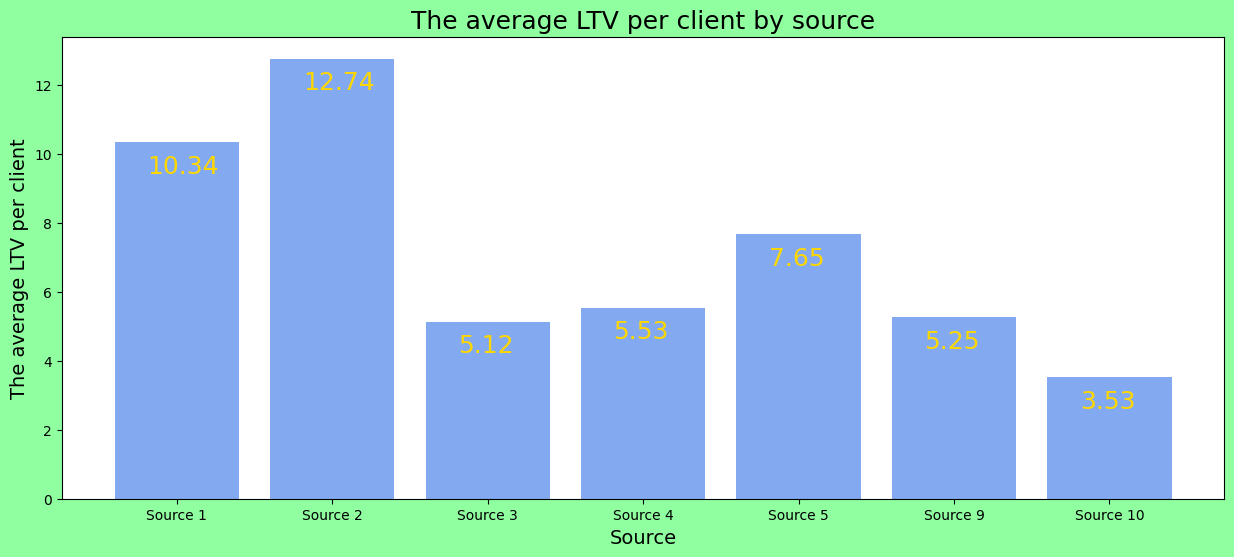

In [79]:
n = len(ltv_source["ltv_customer"])
ind = np.arange(n)

fig, ax = plt.subplots(figsize=(15, 6))
plt.bar(
    ind, ltv_source["ltv_customer"], align="center", alpha=0.8, color="cornflowerblue"
)

fig.patch.set_facecolor("xkcd:mint green")
plt.xlabel("Source", fontsize=14)
plt.ylabel("The average LTV per client", fontsize=14)
plt.title("The average LTV per client by source", fontsize=18)
plt.xticks(ind, ltv_source["label"])
for idx, i in enumerate(ax.patches):
    ax.text(
        i.get_x() + 0.21,
        i.get_height() - 0.9,
        float(int(ltv_source["ltv_customer"][idx] * 100) / 100),
        fontsize=18,
        color="gold",
    )
plt.show()

Conclusion:
As we can see, the largest LTVs are from sources 1 and 2. If the costs of attracting customers from these sources are profitable (as we will learn in the next section), then it is necessary to increase the number of orders from these sources. As we learned earlier, these sources account for approximately 10% of orders.

- Por cohort

In [81]:
# We find the first day of the month in which the current contact took place
orders_all['first_day_of_month_actual_order'] = (
    pd.to_datetime(orders_all['actual_date'], unit='d') 
    -
    pd.to_timedelta(orders_all['actual_date'].dt.day - 1, unit='d') )

In [83]:
# Asegurándonos de que las fechas estén en el formato correcto
orders_all["actual_date"] = pd.to_datetime(orders_all["actual_date"])
orders_all["first_day_of_month_first_session"] = pd.to_datetime(
    orders_all["first_day_of_month_first_session"]
)

# Encontramos el primer día del mes en el que ocurrió la orden actual
orders_all["first_day_of_month_actual_order"] = orders_all[
    "actual_date"
] - pd.to_timedelta(orders_all["actual_date"].dt.day - 1, unit="d")

# Calculamos cuántos meses han pasado entre la orden actual y la primera sesión
orders_all["cohort_lifetime"] = (
    orders_all["first_day_of_month_actual_order"]
    - orders_all["first_day_of_month_first_session"]
).dt.days // 30

# Revisión de los resultados
print(
    orders_all[
        [
            "actual_date",
            "first_day_of_month_actual_order",
            "first_day_of_month_first_session",
            "cohort_lifetime",
        ]
    ].head()
)

  actual_date first_day_of_month_actual_order  \
0  2017-06-01                      2017-06-01   
1  2017-06-01                      2017-06-01   
2  2017-06-01                      2017-06-01   
3  2017-06-01                      2017-06-01   
4  2017-06-01                      2017-06-01   

  first_day_of_month_first_session  cohort_lifetime  
0                       2017-06-01                0  
1                       2017-06-01                0  
2                       2017-06-01                0  
3                       2017-06-01                0  
4                       2017-06-01                0  


In [84]:
# calculating the number of unique users in each cohort every month
cohorts_ltv = (
    orders_all.query('actual_date != "2018-06-01"')
    .groupby(["first_day_of_month_first_session", "cohort_lifetime"])
    .agg({"revenue": ["sum", "count"]})
    .reset_index()
    .reset_index()
)
cohorts_ltv.columns = [
    "index",
    "first_day_of_month_first_session",
    "cohort_lifetime",
    "revenue",
    "count_orders",
]
# counting the number of clients in each cohort
cohorts_ltv_0 = (
    orders_all.groupby("first_day_of_month_first_session")
    .agg({"uid": "nunique"})
    .reset_index()
)
cohorts_ltv_0 = cohorts_ltv_0.rename(columns={"uid": "count_orders_all"})
cohorts_ltv = cohorts_ltv.merge(cohorts_ltv_0, on="first_day_of_month_first_session")
# cohorts_ltv # 79 records

In [85]:
# Let's calculate the total amount of purchases in each cohort
cohorts_cumsum = (
    cohorts_ltv.groupby("first_day_of_month_first_session")
    .agg({"revenue": "cumsum"})
    .reset_index()
)
cohorts_cumsum = cohorts_cumsum.rename(columns={"revenue": "revenue_all"})
cohorts_ltv = cohorts_ltv.merge(cohorts_cumsum, on="index")
cohorts_ltv["revenue_per_user"] = (
    cohorts_ltv["revenue_all"] / cohorts_ltv["count_orders_all"]
)
cohorts_ltv = cohorts_ltv[
    cohorts_ltv["first_day_of_month_first_session"] != "2018-06-01"
]
cohorts_ltv["first_day_of_month_first_session_str"] = cohorts_ltv[
    "first_day_of_month_first_session"
].dt.strftime("%Y.%m")
# cohorts_ltv

In [86]:
# Let's create a pivot table with LTV information for each cohort
cohorts_ltv_pivot_table = cohorts_ltv.pivot_table(
    index="first_day_of_month_first_session_str",
    columns="cohort_lifetime",
    values="revenue_per_user",
    aggfunc="sum",
)
# cohorts_ltv_pivot_table

Text(0.5, 58.7222222222222, 'Cohort Lifetime')

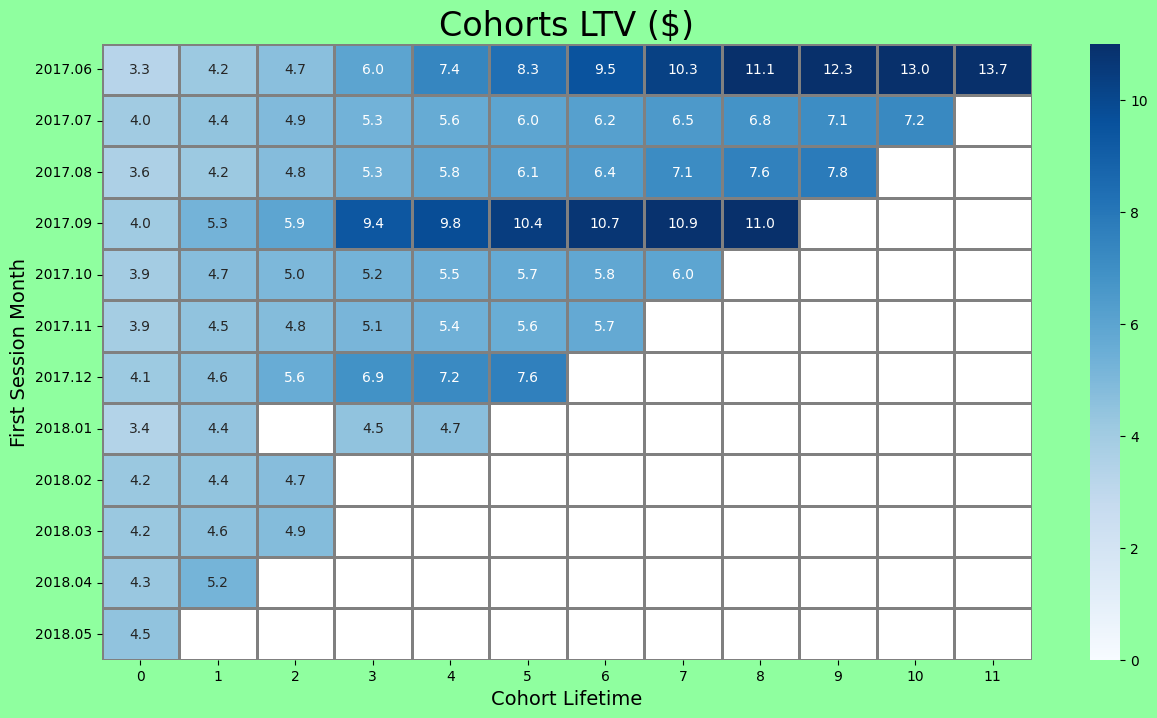

In [87]:
fig, ax = plt.subplots(figsize=(15, 8))
fig.patch.set_facecolor("xkcd:mint green")
plt.title("Cohorts LTV ($)", fontsize=24)

sns.heatmap(
    cohorts_ltv_pivot_table,
    annot=True,
    fmt=".1f",
    linewidths=1,
    linecolor="grey",
    vmin=0,
    vmax=11,
    cmap="Blues",
)
ax.set_ylabel("First Session Month", fontsize=14)
ax.set_xlabel("Cohort Lifetime", fontsize=14)

Conclusion:
On average, each customer from the first cohort brought 13.7 dollars in revenue over their eleven-month lifetime. As we can see, not all cohorts bring the same profit per client. The most profitable were the first 4 cohorts. There is also an unexpectedly sharp rise in LTV in the fourth cohort in the fourth month from 5.9 to 9.4.

## 2.3 MARKETING

**- ¿Cuánto dinero se gastó? (Total/por fuente de adquisición/a lo largo del tiempo)**

- Diario

In [88]:
costs  # 2542 records
costs_daily = costs.groupby("dt").agg({"costs": "sum"})

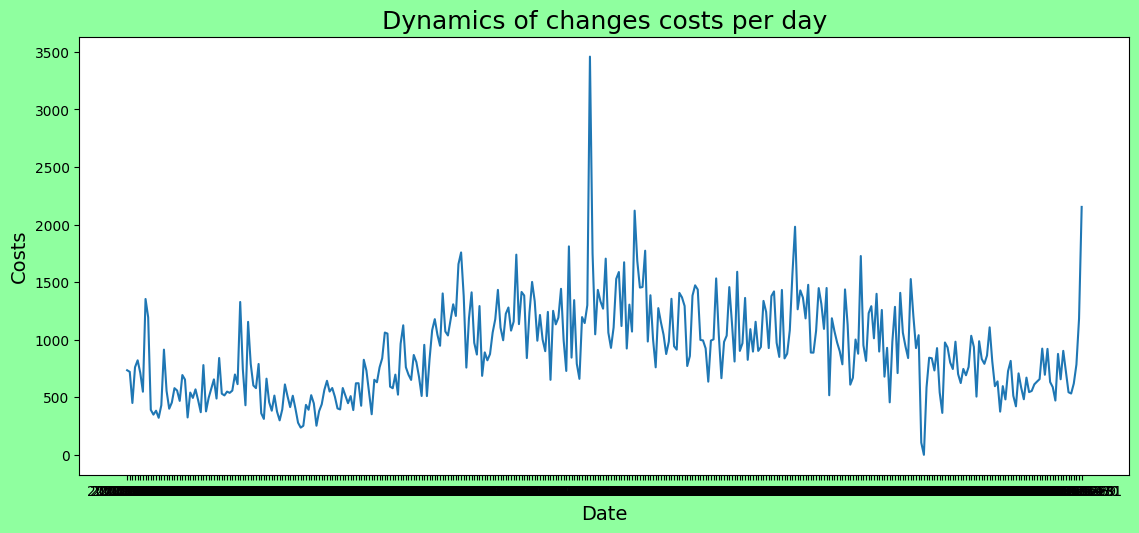

In [89]:
fig, ax = plt.subplots(figsize=(15, 6))
fig.subplots_adjust(bottom=0.15, left=0.2)
ax.plot(
    costs_daily,
)
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Costs", fontsize=14)
ax.set_title("Dynamics of changes costs per day", fontsize=18)
fig.patch.set_facecolor("xkcd:mint green")
# ax.set_xlim(17480, 17500) # 24.11.2017

plt.show()

Conclusion:
This graph is very similar to the number of visits per day. This is not surprising, because visits directly depend on the funds spent. Since August we have seen an increase in costs. From October to March, the costs are approximately at the same level, and from March, the cost of attracting customers has been decreasing.
We also see a daily sharp increase in costs on November 24, 2017, from 1,200 to 3,500. This explains why in the previous parts we saw an abnormal number of orders, visits, income over the same period.

**- ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?**

In [90]:
costs_source = costs.groupby("source_id").agg({"costs": "sum"}).reset_index()
costs_source["label"] = costs_source.apply(
    create_label, axis=1
)  # create label for graph

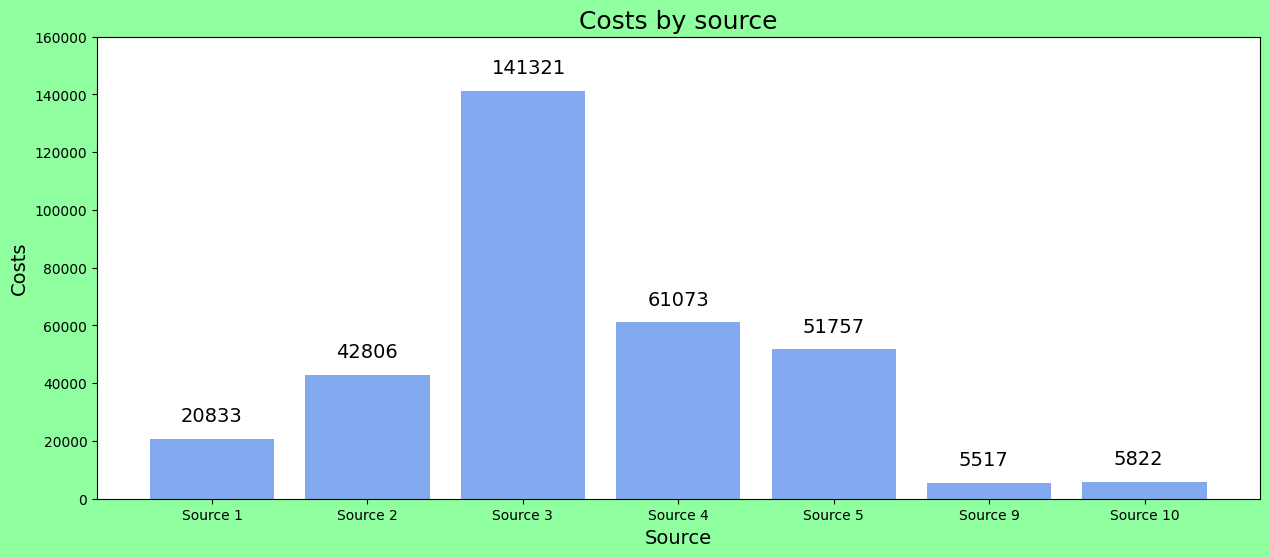

In [91]:
# create a plot
n = len(costs_source["costs"])
ind = np.arange(n)

fig, ax = plt.subplots(figsize=(15, 6))
plt.bar(ind, costs_source["costs"], align="center", alpha=0.8, color="cornflowerblue")

fig.patch.set_facecolor("xkcd:mint green")
plt.xlabel("Source", fontsize=14)
plt.ylabel("Costs", fontsize=14)
plt.title("Costs by source", fontsize=18)
plt.xticks(ind, costs_source["label"])
ax.set_ylim([0, 160000])
for idx, i in enumerate(ax.patches):
    ax.text(
        i.get_x() + 0.2,
        i.get_height() + 6000,
        int(costs_source["costs"][idx]),
        fontsize=14,
        color="black",
    )
plt.show()

Conclusion:
As we can see, the largest costs for Source 3 are more than 2.5 times more than for Source 4, however, as we determined earlier, Sources 3 and 4 give approximately the same number of orders. Obviously, the advertising budget should be reallocated between Sources 3 and 4.

- El costo de atraer clientes por fuente


In [92]:
# Let's count the number of clients from each source
source_number_buyers = (
    orders_all.query("source_id != 7")
    .groupby("source_id", as_index=False)
    .agg({"uid": "nunique"})
)
costs_source = costs_source.merge(source_number_buyers, on="source_id")
costs_source = costs_source.rename(columns={"uid": "count_buyers"})

In [93]:
# Let's count CAC by source
costs_source["cac"] = costs_source["costs"] / costs_source["count_buyers"]

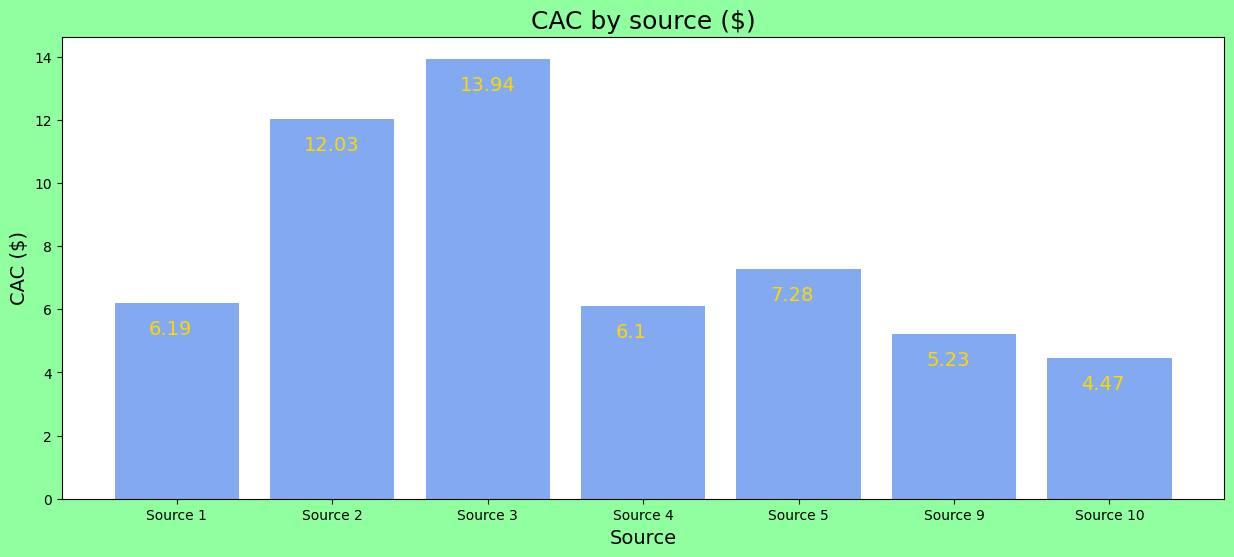

In [94]:
n = len(costs_source["cac"])
ind = np.arange(n)

fig, ax = plt.subplots(figsize=(15, 6))
plt.bar(ind, costs_source["cac"], align="center", alpha=0.8, color="cornflowerblue")

fig.patch.set_facecolor("xkcd:mint green")
plt.xlabel("Source", fontsize=14)
plt.ylabel("CAC ($)", fontsize=14)
plt.title("CAC by source ($)", fontsize=18)
plt.xticks(ind, costs_source["label"])
for idx, i in enumerate(ax.patches):
    ax.text(
        i.get_x() + 0.22,
        i.get_height() - 1,
        float(int(costs_source["cac"][idx] * 100) / 100),
        fontsize=14,
        color="gold",
    )
plt.show()

Conclusion:
As we can see, Sources 2 and 3 have the highest costs per customer acquisition. And if for Source 2 this is somehow justified by the fact that LTV is large enough, then for Source 3 and LTV is very small and the cost of attracting a new client is very high.

- Por cohorte

In [96]:
# Asegurándonos de que 'dt' esté en formato datetime
costs["dt"] = pd.to_datetime(costs["dt"])

# Encontrando el primer día del mes
costs["first_day_of_month_first_session"] = costs["dt"] - pd.to_timedelta(
    costs["dt"].dt.day - 1, unit="d"
)

# Agrupando los costos por el primer día del mes
costs_month = costs.groupby("first_day_of_month_first_session", as_index=False).agg(
    {"costs": "sum"}
)

# Revisamos los resultados
print(costs_month.head())

  first_day_of_month_first_session     costs
0                       2017-06-01  18015.00
1                       2017-07-01  18240.59
2                       2017-08-01  14790.54
3                       2017-09-01  24368.91
4                       2017-10-01  36322.88


In [97]:
costs_month = costs_month.merge(cohorts_ltv_0, on="first_day_of_month_first_session")
# Let's calculate CAC by cohorts
costs_month["cac"] = costs_month["costs"] / costs_month["count_orders_all"]
costs_month["first_month_str"] = costs_month[
    "first_day_of_month_first_session"
].dt.strftime("%m.%Y")

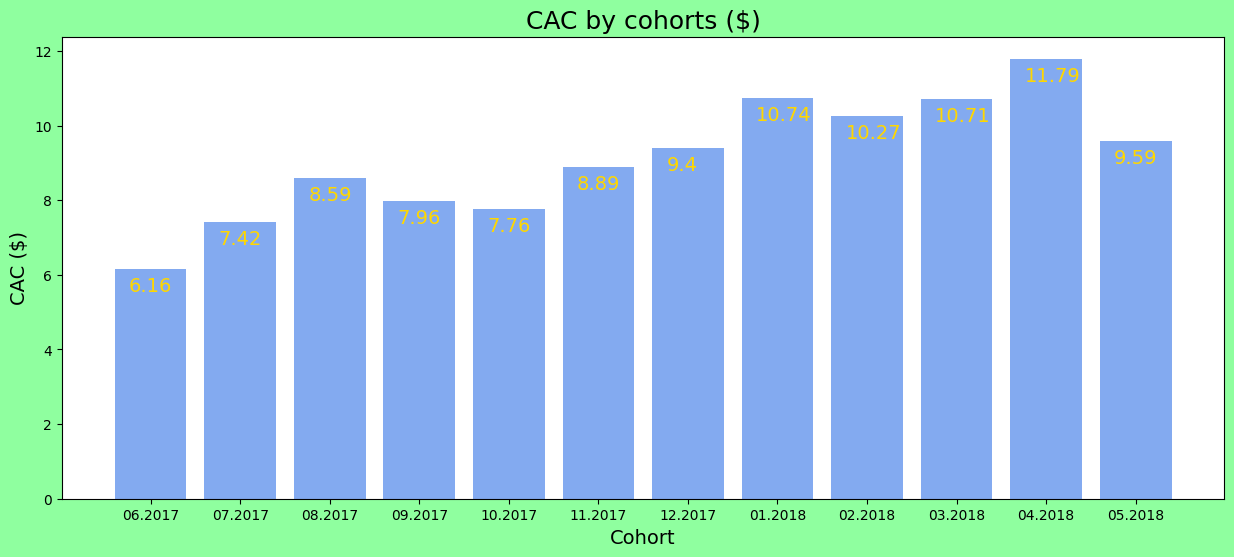

In [98]:
n = len(costs_month["cac"])
ind = np.arange(n)

fig, ax = plt.subplots(figsize=(15, 6))
plt.bar(ind, costs_month["cac"], align="center", alpha=0.8, color="cornflowerblue")

fig.patch.set_facecolor("xkcd:mint green")
plt.xlabel("Cohort", fontsize=14)
plt.ylabel("CAC ($)", fontsize=14)
plt.title("CAC by cohorts ($)", fontsize=18)
plt.xticks(ind, costs_month["first_month_str"])
for idx, i in enumerate(ax.patches):
    ax.text(
        i.get_x() + 0.16,
        i.get_height() - 0.6,
        float(int(costs_month["cac"][idx] * 100) / 100),
        fontsize=14,
        color="gold",
    )
plt.show()

Conclusion:
As we can see, the costs grow with each cohort. We know that some customers make their first purchase more than 30 days after their first visit. Thus, costs in cohorts 04.2018 and 05.2018 will decrease.

- CALCULANDO EL ROI

In [99]:
# Revenue from customers from each cohort.
cohorts_revenue = orders_all.groupby(
    "first_day_of_month_first_session", as_index=False
).agg({"revenue": "sum"})

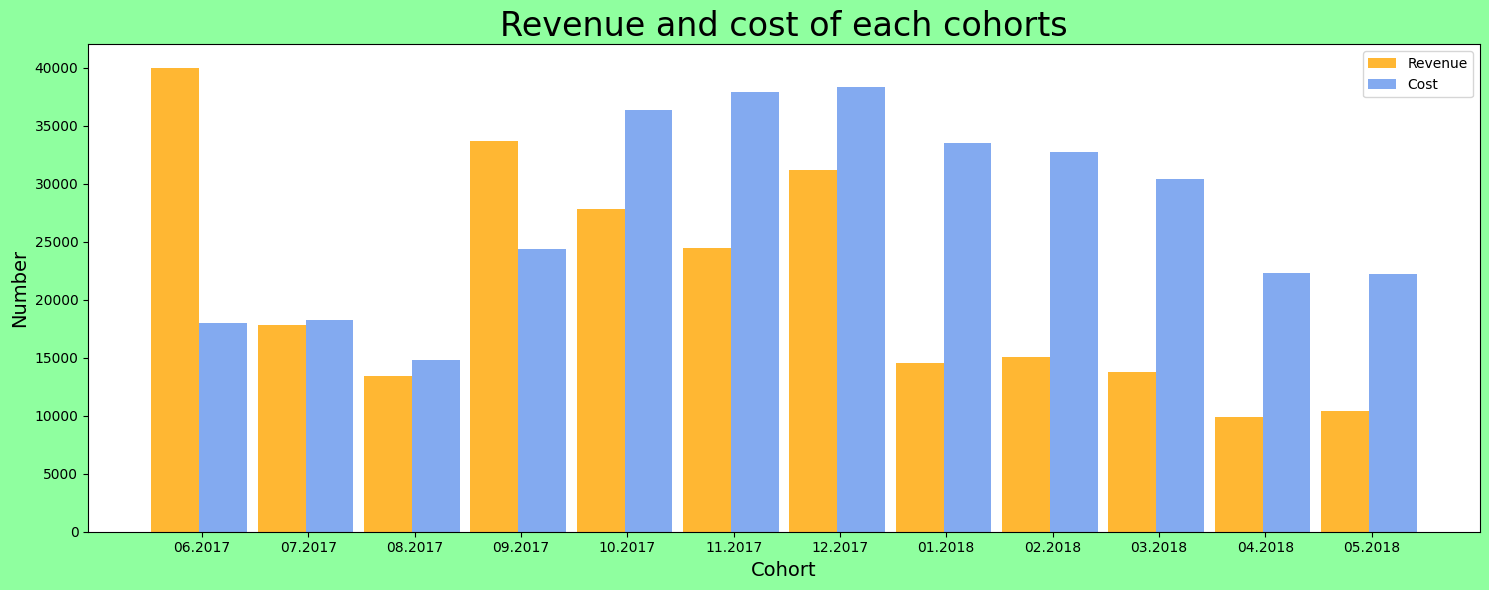

In [100]:
# one chart with two columns per cohorts / revenue + cost
all_cohorts_dict = list(costs_month["first_month_str"].tolist())
n_groups = len(all_cohorts_dict)

# create plot
fig, ax = plt.subplots(figsize=(15, 6))
fig.patch.set_facecolor("xkcd:mint green")
index = np.arange(n_groups)
bar_width = 0.45
opacity = 0.8
rects1 = plt.bar(
    index,
    cohorts_revenue["revenue"],
    bar_width,
    alpha=opacity,
    color="orange",
    label="Revenue",
)

rects2 = plt.bar(
    index + bar_width,
    costs_month["costs"],
    bar_width,
    alpha=opacity,
    color="cornflowerblue",
    label="Cost",
)

plt.xlabel("Cohort", fontsize=14)
plt.ylabel("Number", fontsize=14)
plt.title("Revenue and cost of each cohorts", fontsize=24)

plt.xticks(index + bar_width - 0.2, all_cohorts_dict)
plt.legend()

plt.tight_layout()
plt.show()

Conclusion:
As we can see in the histogram, in only 2 cohorts, revenue is greater than costs. This says that you need to look for problem areas and make adjustments.

- CALCULANDO EL ROMI

In [101]:
cohorts_romi = cohorts_ltv.merge(
    costs_month[["first_day_of_month_first_session", "costs"]],
    on="first_day_of_month_first_session",
)
cohorts_romi["romi"] = cohorts_romi["revenue_all"] / cohorts_romi["costs"]

In [102]:
# Let's create a pivot table with ROMI information for each cohort
cohorts_romi_pivot_table = cohorts_romi.pivot_table(
    index="first_day_of_month_first_session_str",
    columns="cohort_lifetime",
    values="romi",
    aggfunc="sum",
)

Text(0.5, 58.7222222222222, 'Cohort Lifetime')

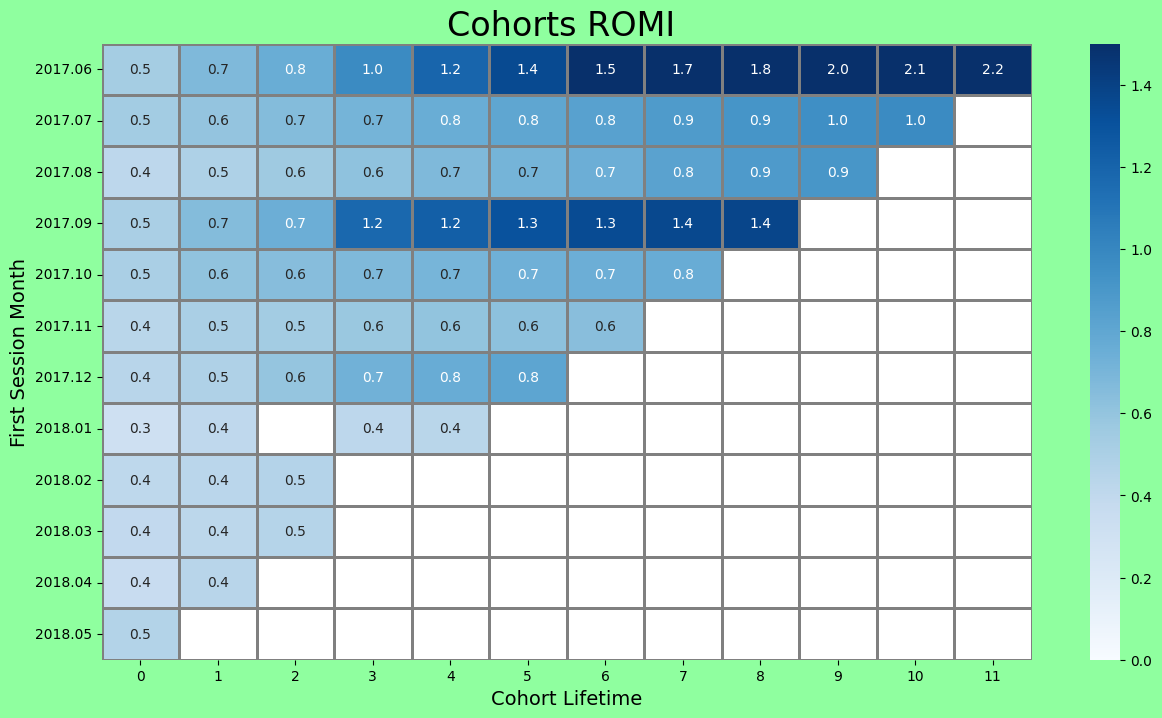

In [103]:
fig, ax = plt.subplots(figsize=(15, 8))
fig.patch.set_facecolor("xkcd:mint green")
plt.title("Cohorts ROMI ", fontsize=24)

sns.heatmap(
    cohorts_romi_pivot_table,
    annot=True,
    fmt=".1f",
    linewidths=1,
    linecolor="grey",
    vmin=0,
    vmax=1.5,
    cmap="Blues",
)
ax.set_ylabel("First Session Month", fontsize=14)
ax.set_xlabel("Cohort Lifetime", fontsize=14)

Conclusion:
As you can see from the graph, the profitability situation is very bad. The investment made in the promotion does not pay off. Only in three cohorts (1, 2, and 4), revenue exceeded costs. It can be assumed that if the costs pay off over time, then the current business model cannot be called successful. We urgently need to make adjustments. Also, we cannot assume for what month the cohort will return the funds invested in attracting a client since only 3 cohorts returned their investments, and 2 of them have clearly abnormal dynamics. It is difficult to make an accurate forecast based on the available data.